# Network Intrusion Detection System

### Network intrusion has become one of the biggest challenge in the current world. The main intent for this analysis is to provide a mechanism to detect network intrusion based on the historical data and come up with models around the same 

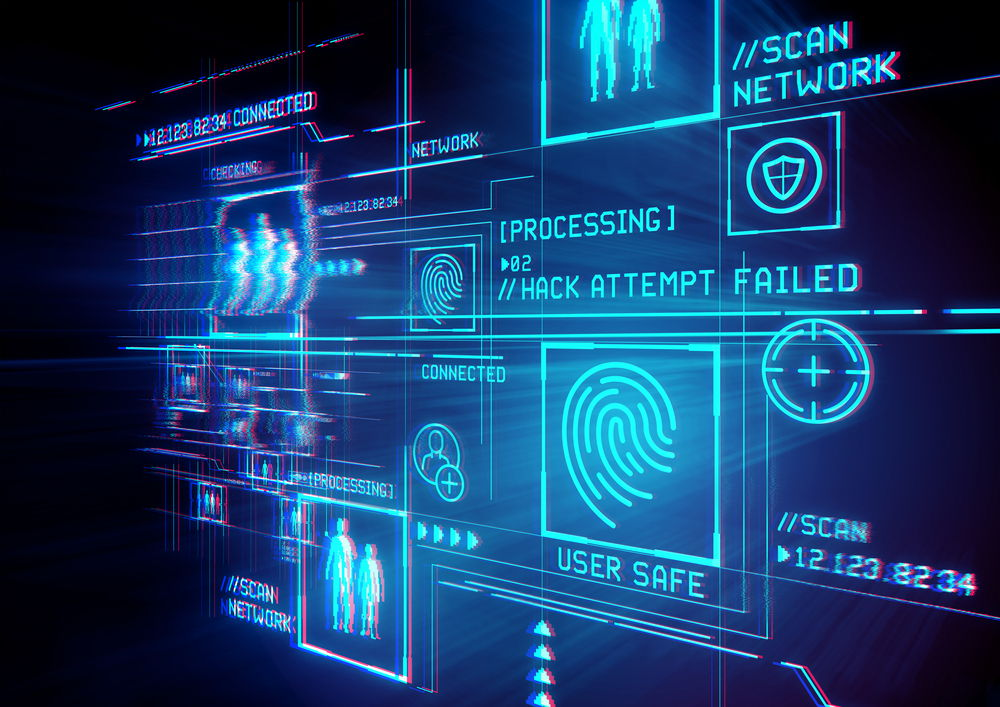

# Data Dictionary
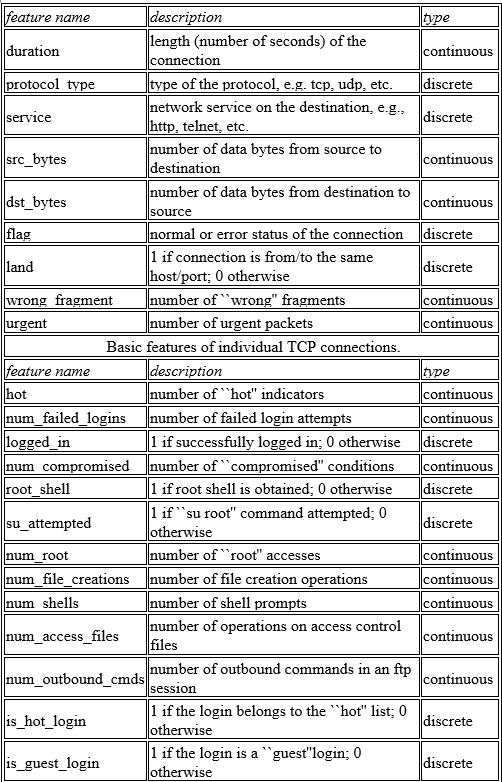
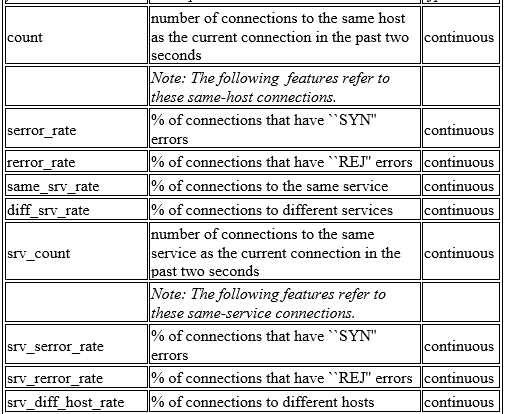

In [1]:
__author__ = "Vijay Krishnan MR"
__email__ = "viajykrishnanmr@gmail.com"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import statsmodels.formula.api as SM
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
#from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,roc_curve,classification_report
import re
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import PCA
from matplotlib.patches import Rectangle
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import zscore
warnings.filterwarnings("ignore")

In [3]:
ni_df=pd.read_csv('networkintrusion.csv')

In [4]:
ni_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983.0,0.0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [5]:
ni_df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
22539,0,tcp,smtp,SF,794.0,333.0,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317.0,938.0,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540.0,8314.0,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,anomaly
22542,0,udp,domain_u,SF,42.0,42.0,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal
22543,0,tcp,sunrpc,REJ,0.0,0.0,0,0,0,0,...,21,0.08,0.03,0.00,0.00,0.00,0.0,0.44,1.00,anomaly


In [6]:
ni_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22538 non-null  float64
 5   dst_bytes                    22538 non-null  float64
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [7]:
ni_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,22544.0,218.859076,1407.176612,0.0,0.00,0.00,0.0000,57715.0
src_bytes,22538.0,10398.121706,472849.333214,0.0,0.00,54.00,287.0000,62825648.0
dst_bytes,22538.0,2055.583770,21221.899178,0.0,0.00,46.00,601.0000,1345927.0
land,22544.0,0.000311,0.017619,0.0,0.00,0.00,0.0000,1.0
wrong_fragment,22544.0,0.008428,0.142599,0.0,0.00,0.00,0.0000,3.0
urgent,22544.0,0.000710,0.036473,0.0,0.00,0.00,0.0000,3.0
hot,22544.0,0.105394,0.928428,0.0,0.00,0.00,0.0000,101.0
num_failed_logins,22544.0,0.021647,0.150328,0.0,0.00,0.00,0.0000,4.0
logged_in,22544.0,0.442202,0.496659,0.0,0.00,0.00,1.0000,1.0
num_compromised,22544.0,0.119899,7.269597,0.0,0.00,0.00,0.0000,796.0


### Functions used in the program

#### Function for Outlier Treatment 

In [8]:
def treat_outlier1(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

### Plotting Decision Tree 

In [9]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['N/w Intruded', "N/w not Intruded"],
                       filled=True)

### Function to  find special chars & any repetitive data points which aren't duplicates

In [10]:
def find_specialchar(df):
    for feature in df.columns:
        print('The unique values in ' , feature , 'are as below')
        print('\n')
        print(df[feature].unique())
        print('\n')
    return

### Function to check VIF for multicolinearity

In [11]:
def vif_cal(input_data):
    
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

# Basic Data Exploration 

**In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:**

- **shape of the dataset**
- **info of the dataset**
- **summary of the dataset**
- **check for any Null Values**
- **check for any Duplicate records**
- **check for any special charecters**

In [12]:
ni_df.shape

(22544, 40)

In [13]:
ni_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      6
dst_bytes                      6
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
num_root                       0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          9
srv_count                      9
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

##### The following fields have missing values it is better  for us to have them dropped
-  src_bytes 6 
-  dst_bytes 6 
-  count 9 
-  srv_count 9

In [14]:
# Check for duplicate data

dups = ni_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

ni_df[dups]

Number of duplicate rows = 3


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
10256,0,tcp,other,REJ,0.0,0.0,0,0,0,0,...,1,0.0,1.0,0.0,0.0,0.07,0.0,0.93,1.0,anomaly
10619,0,tcp,other,REJ,0.0,0.0,0,0,0,0,...,1,0.0,1.0,0.0,0.0,0.03,0.0,0.97,1.0,anomaly
15044,0,tcp,other,REJ,0.0,0.0,0,0,0,0,...,1,0.0,1.0,0.0,0.0,0.02,0.0,0.98,1.0,anomaly


#### We will drop duplicate values

In [15]:
ni_df.drop_duplicates(inplace=True)

In [16]:
ni_df.shape

(22541, 40)

In [17]:
find_specialchar(ni_df)

The unique values in  duration are as below


[    0     2     1    37   805     8   282  7428     4   280  8092     3
    31  8080  8124  7554  2079  7466  8169   281  7526  7510    27  2069
   902     5   283  7587     7     6  8213 12931    20  7971  7646   804
  7590  7290  8027  7566  2057   288   841  2066 54451  7400   898    21
  7256  8185   895  7446   918  7606  7253  8048   848   289   814   903
  8108    13   791  7517  8228    58  1179   807   901   806  1964  7682
  7593   899   801   798  7224  8156  7252   300   936  7408  7534  7232
    30    41  8157  8084  7238   284  2075    11    23   926  8181  8890
  7245  8217    18   904     9  2077  2074  7542  7320    10   992   896
  2078 53771  2065  7541    84  7863    29  8153  8072  8176  7294  2060
  7482  7514   808  7598    60  8152   293  8201  8064  2092  7330  7654
  7638  7454  8132  2362  8109   297   810   242  7486    28  7296   788
  5566  7368  2073  8224   906  7502  7530  8031   812  2044   939  7473
  743

#### The following fields are of categorical
- protocol_type,service,flag,land,wrong_fragment,urgent,
- hot,num_failed_logins,logged_in,num_compromised,root_shell,
- num_root,num_access_files,is_host_login,is_guest_login,count,
- srv_count,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate
- srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate
- dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
- dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,duration

##### Contineous fields are the below
- src_bytes
- dst_bytes

##### num_outbound_cmds -only 0 so this could be dropped

In [18]:
ni_df1=ni_df.copy()

In [19]:
ni_df1.shape

(22541, 40)

In [20]:
ni_df1.dropna(inplace=True)

In [21]:
ni_df1.drop(['num_outbound_cmds'],axis=1, inplace=True)

In [22]:
ni_df1['class_target']=ni_df1['class'].map({'anomaly':1,'normal':0})

In [23]:
ni_df1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,class_target
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly,1
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly,1
2,2,tcp,ftp_data,SF,12983.0,0.0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,0
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly,1
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly,1


In [24]:
ni_df1.drop(['class'], axis=1,inplace=True)

In [25]:
ni_df1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_target
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,tcp,ftp_data,SF,12983.0,0.0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1


In [26]:
ni_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22526 entries, 0 to 22543
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22526 non-null  int64  
 1   protocol_type                22526 non-null  object 
 2   service                      22526 non-null  object 
 3   flag                         22526 non-null  object 
 4   src_bytes                    22526 non-null  float64
 5   dst_bytes                    22526 non-null  float64
 6   land                         22526 non-null  int64  
 7   wrong_fragment               22526 non-null  int64  
 8   urgent                       22526 non-null  int64  
 9   hot                          22526 non-null  int64  
 10  num_failed_logins            22526 non-null  int64  
 11  logged_in                    22526 non-null  int64  
 12  num_compromised              22526 non-null  int64  
 13  root_shell      

In [27]:
results = pd.DataFrame(dtype='int',columns=[['Train_Accuracy','Test_Accuracy','Train_ROC-AUC','Test_ROC-AUC']],
                       index=['RF','KNN','DT','Log_R','NN','NB'])

In [28]:
ni_df1['class']= ni_df1['class_target'].astype('category')

In [29]:
ni_df1['class_target'].value_counts()

1    12824
0     9702
Name: class_target, dtype: int64

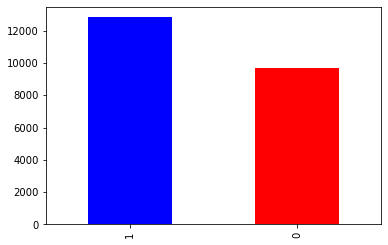

In [30]:
ni_df1['class_target'].value_counts().plot(kind='bar',color=['blue','red']);

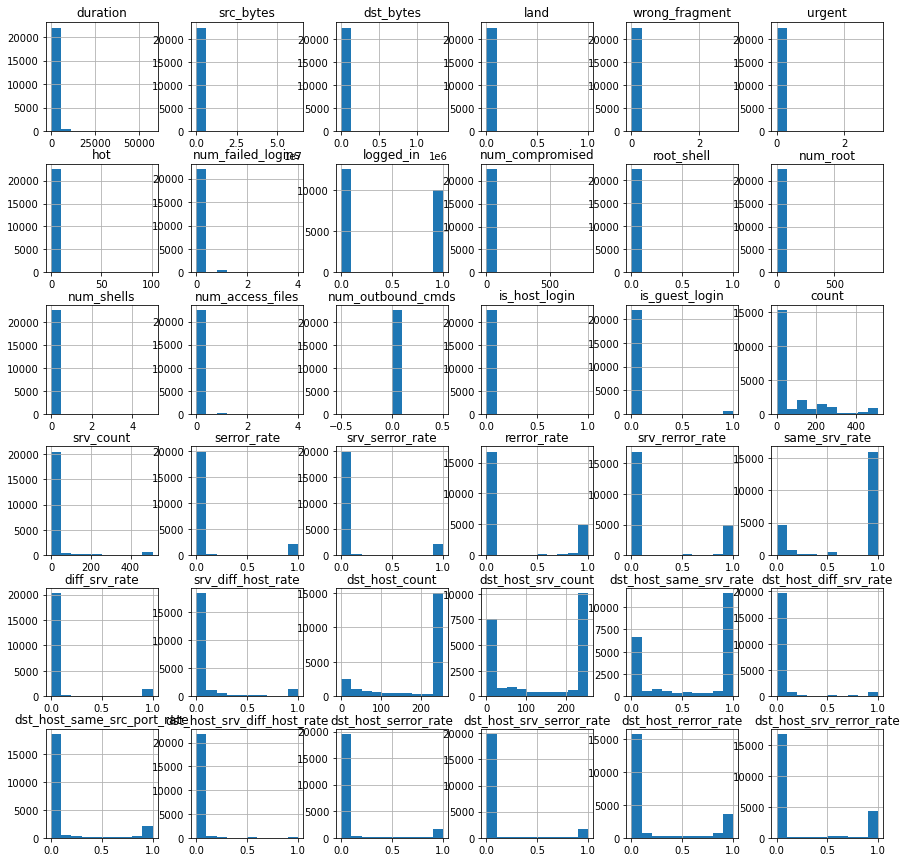

In [31]:
rcParams['figure.figsize'] = 15, 15
ni_df.hist();

In [32]:
ni_df1.srv_count.nunique()

457

In [33]:
ni_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22526 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   duration                     22526 non-null  int64   
 1   protocol_type                22526 non-null  object  
 2   service                      22526 non-null  object  
 3   flag                         22526 non-null  object  
 4   src_bytes                    22526 non-null  float64 
 5   dst_bytes                    22526 non-null  float64 
 6   land                         22526 non-null  int64   
 7   wrong_fragment               22526 non-null  int64   
 8   urgent                       22526 non-null  int64   
 9   hot                          22526 non-null  int64   
 10  num_failed_logins            22526 non-null  int64   
 11  logged_in                    22526 non-null  int64   
 12  num_compromised              22526 non-null  int64   
 13  r

In [34]:
import matplotlib.gridspec as gridspec

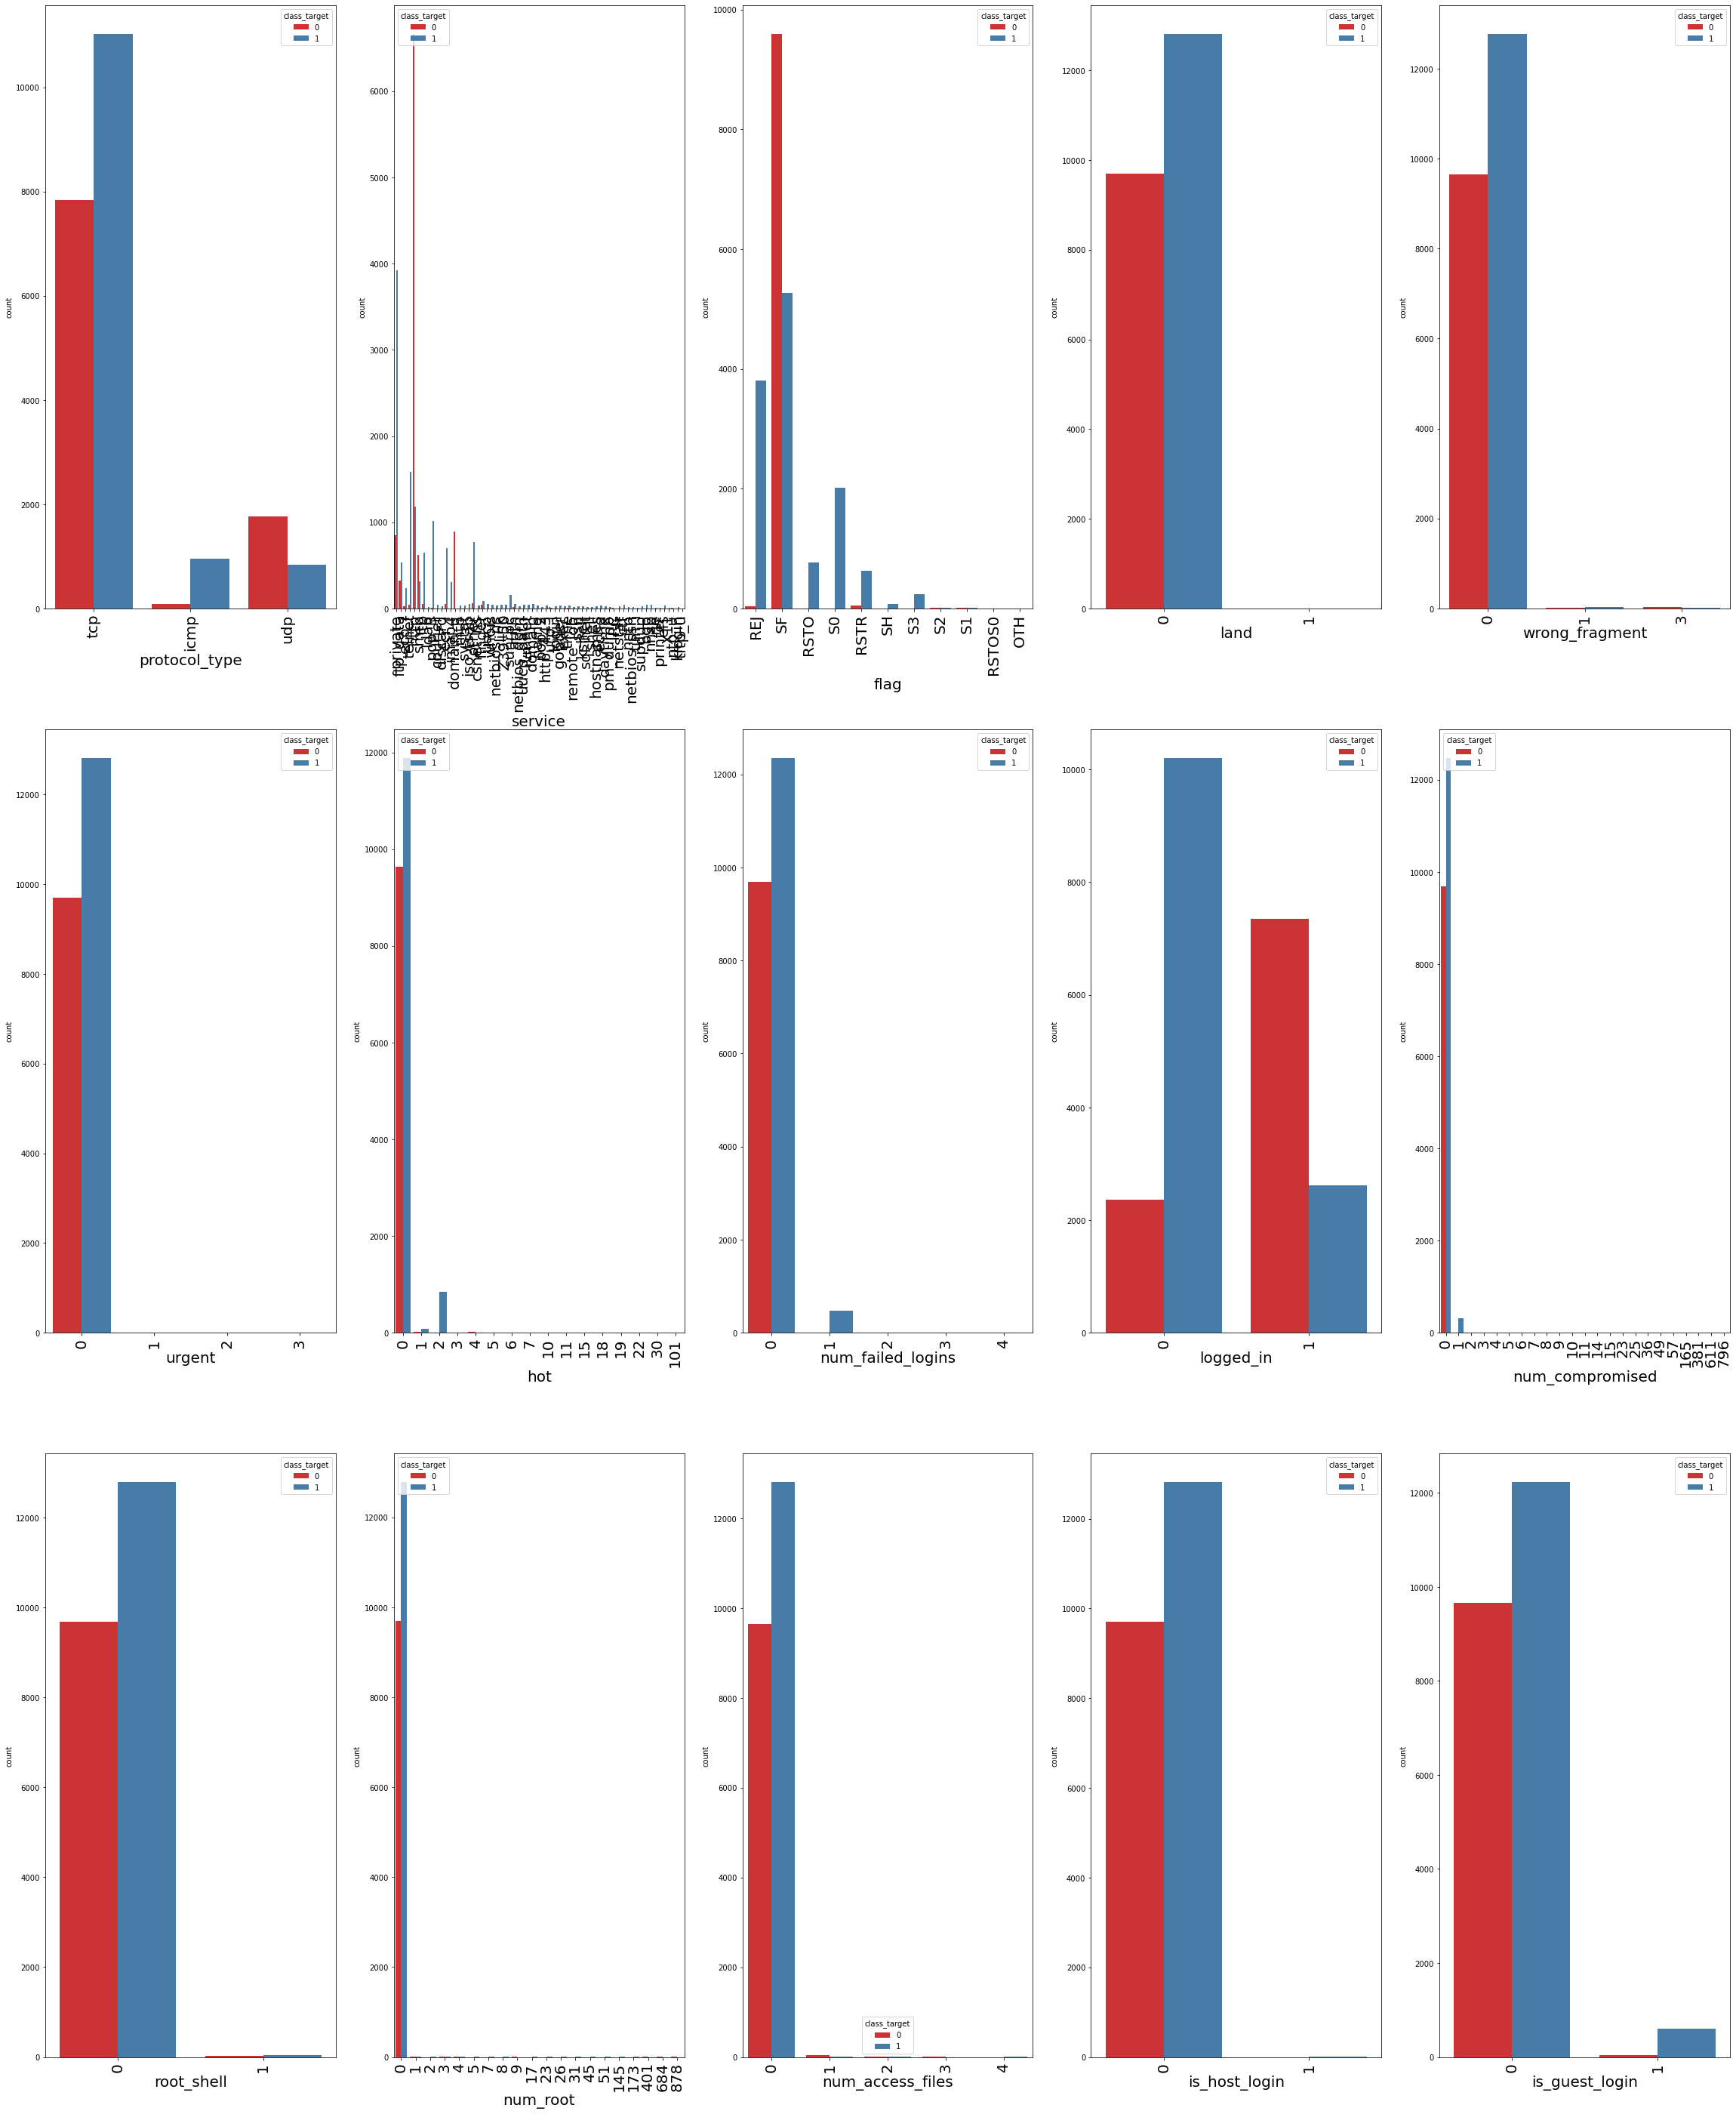

In [35]:
ni_CAT = ['protocol_type','service','flag','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
             'root_shell','num_root','num_access_files','is_host_login','is_guest_login']

#  Categorical Data
a = 3  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(40,50))

for i in ni_CAT:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    plt.xticks(rotation=90,fontsize=20)
    #plt.xticks(rotation=90)
    #plt.pyplot.xticks(fontsize=14)
    plt.xlabel('x-axis', fontsize=20)
    sns.countplot(ni_df1[i],hue=ni_df1['class_target'],palette="Set1")
    c = c + 1

##### As there are some cluttering on graphs we will look to have a deep drive below on Service, protocol & flag. From the above we can look at intrusions hapepn a lot on Land (happens irrespective, so can be dropped), wromg fragment(happens irrespective, so can be dropped), urgent, hot,num_failed logins,logged_in, num_compromised,root_shell, num_root, num_access_files, is_host_login, is_guest_login. At this moment we will not be dropping any features

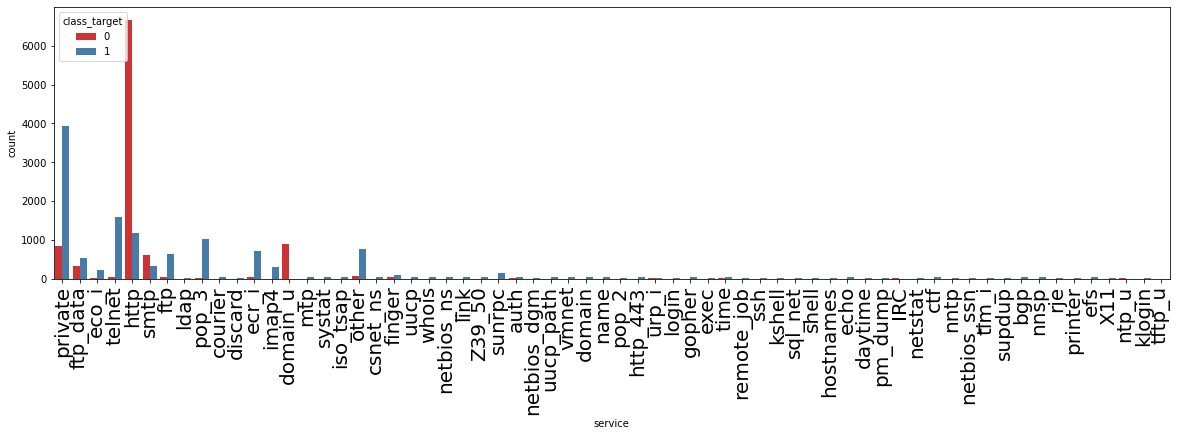

In [36]:
fig = plt.figure(figsize=(20,5))
sns.countplot(ni_df1['service'],hue=ni_df1['class_target'],palette="Set1")
plt.xticks(rotation=90,fontsize=20);

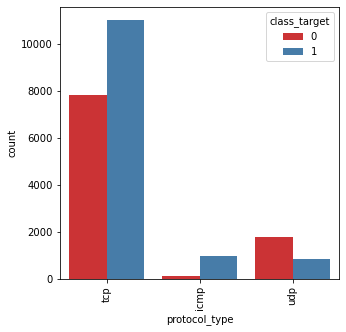

In [37]:
fig = plt.figure(figsize=(5,5))
sns.countplot(ni_df1['protocol_type'],hue=ni_df1['class_target'],palette="Set1")
plt.xticks(rotation=90,fontsize=10);

##### Intrusion attacks happen more when it is ICMP followed by TCP protocols and these are used for c ommunicating with outside world, UDP is hardly used and limited to intranet but intrusions are still dtected.

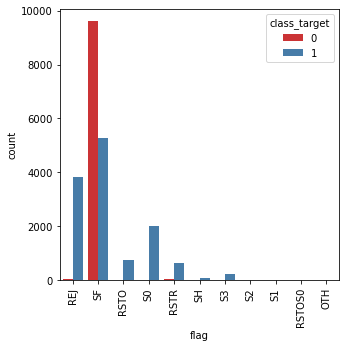

In [38]:
fig = plt.figure(figsize=(5,5))
sns.countplot(ni_df1['flag'],hue=ni_df1['class_target'],palette="Set1")
plt.xticks(rotation=90,fontsize=10);

##### Intrusions happen when the flags are set to REJ, RSTO,S0,RSTR, S1 & S3

In [39]:
#sns.pairplot(ni_df1.drop(['class'],axis=1), hue='class_target',palette='hls')
#plt.show()

<AxesSubplot:title={'center':'Correlation with target'}>

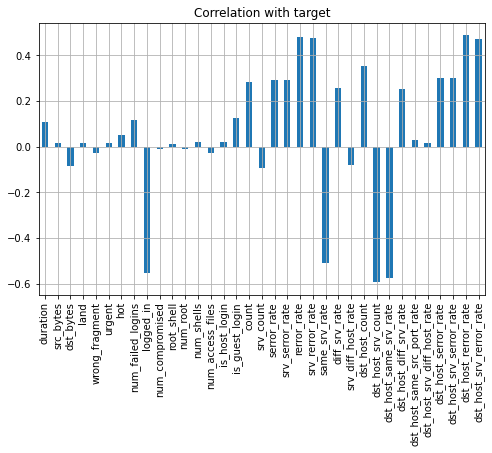

In [40]:
ni_df1.drop(['class','class_target'], axis=1).corrwith(ni_df1.class_target).plot(kind='bar', grid=True, figsize=(8, 5), 
                                                   title="Correlation with target")

In [41]:
ni_df2=ni_df1.copy()

In [42]:
ni_df2.drop(['class_target','class'],axis=1, inplace=True)

In [43]:
corr1 = ni_df2.corr(method='pearson')

<Figure size 720x864 with 0 Axes>

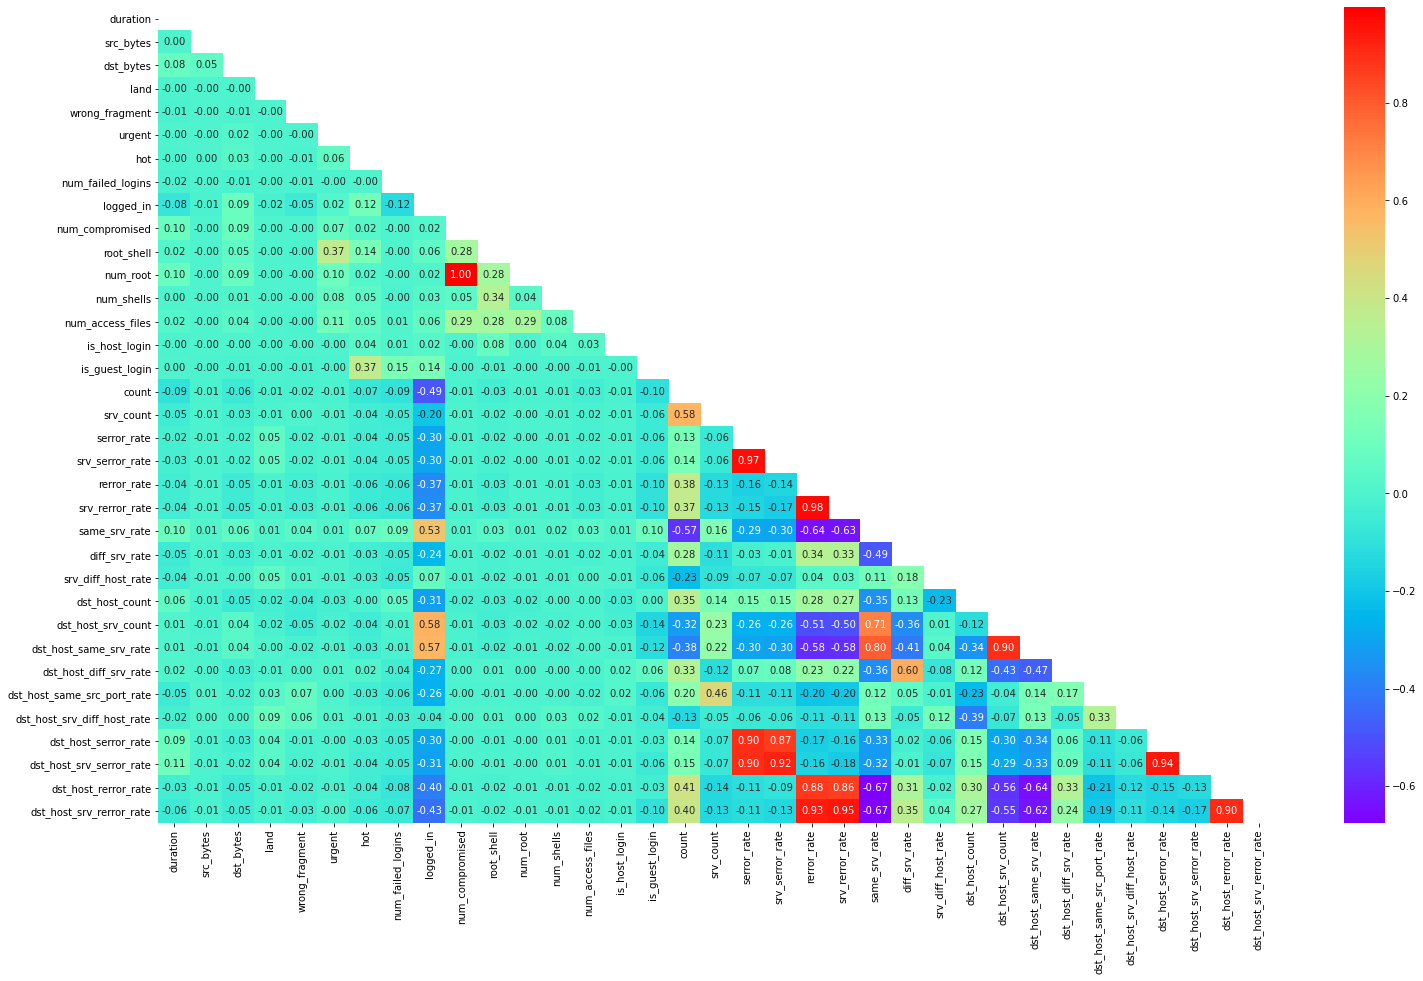

In [44]:
plt.figure(figsize=(10,12))
mask = np.triu(np.ones_like(corr1, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(ni_df2.corr(), annot=True,fmt='.2f',mask=mask, cmap='rainbow')
plt.show()

In [45]:
corr1.style.applymap(lambda x: 'background-color : red' if x> 0.7 or x<-0.7 else '')

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.002672,0.078968,-0.002743,-0.009200,-0.000051,-0.004688,-0.021151,-0.075715,0.095383,0.019840,0.095268,0.001627,0.022903,-0.002634,0.000055,-0.090563,-0.046638,-0.021713,-0.026985,-0.039481,-0.035465,0.095739,-0.050100,-0.038726,0.060683,0.010098,0.005001,0.016852,-0.052339,-0.024141,0.093257,0.107709,-0.029392,-0.055983
src_bytes,0.002672,1.000000,0.053637,-0.000388,-0.001248,-0.000333,0.002621,-0.003126,-0.009642,-0.000099,-0.000861,-0.000274,-0.000388,-0.001021,-0.000479,-0.003707,-0.012450,-0.006029,-0.007242,-0.007227,-0.005738,-0.005586,0.013745,-0.007684,-0.006799,-0.009420,-0.014245,-0.006802,-0.002911,0.008964,0.004873,-0.007702,-0.007497,-0.010354,-0.009958
dst_bytes,0.078968,0.053637,1.000000,-0.001707,-0.005722,0.017559,0.027897,-0.011143,0.091482,0.089813,0.054142,0.088294,0.011367,0.038302,-0.001267,-0.011869,-0.055358,-0.025474,-0.019651,-0.019893,-0.053398,-0.052794,0.059801,-0.031706,-0.004268,-0.054960,0.037820,0.041078,-0.030871,-0.018973,0.002828,-0.030136,-0.020382,-0.054060,-0.051535
land,-0.002743,-0.000388,-0.001707,1.000000,-0.001042,-0.000343,-0.002001,-0.002537,-0.015698,-0.000291,-0.000872,-0.000252,-0.000424,-0.000923,-0.000390,-0.003017,-0.010701,-0.005764,0.053539,0.052964,-0.010104,-0.009963,0.011097,-0.006398,0.052769,-0.021747,-0.021658,-0.001276,-0.005175,0.025535,0.090889,0.035823,0.042385,-0.010497,-0.009970
wrong_fragment,-0.009200,-0.001248,-0.005722,-0.001042,1.000000,-0.001151,-0.006710,-0.008508,-0.052645,-0.000975,-0.002925,-0.000843,-0.001421,-0.003095,-0.001307,-0.010119,-0.019784,0.003531,-0.020607,-0.020545,-0.033887,-0.033412,0.037217,-0.021456,0.008949,-0.041470,-0.050802,-0.015479,0.001523,0.070659,0.061632,-0.009638,-0.020862,-0.023898,-0.033436
urgent,-0.000051,-0.000333,0.017559,-0.000343,-0.001151,1.000000,0.061987,-0.002801,0.021864,0.070114,0.368833,0.096064,0.075524,0.106566,-0.000430,-0.003332,-0.011816,-0.006584,-0.006785,-0.006764,-0.011157,-0.011000,0.012253,-0.007064,-0.007534,-0.027864,-0.019613,-0.006616,0.009013,0.002600,0.011191,-0.004701,-0.006782,-0.009974,-0.001812
hot,-0.004688,0.002621,0.027897,-0.002001,-0.006710,0.061987,1.000000,-0.000103,0.122257,0.024979,0.140642,0.022530,0.048028,0.052532,0.038602,0.365532,-0.068106,-0.035452,-0.037193,-0.037321,-0.056632,-0.057103,0.068150,-0.033142,-0.025858,-0.003878,-0.041890,-0.029958,0.016897,-0.033382,-0.010375,-0.025529,-0.036628,-0.035827,-0.058150
num_failed_logins,-0.021151,-0.003126,-0.011143,-0.002537,-0.008508,-0.002801,-0.000103,1.000000,-0.122173,-0.000870,-0.001132,-0.000877,-0.003458,0.014241,0.010194,0.145973,-0.087167,-0.048416,-0.046150,-0.046038,-0.064128,-0.062976,0.090215,-0.051075,-0.054527,0.049322,-0.007378,-0.009745,-0.038918,-0.060016,-0.029636,-0.049789,-0.048339,-0.079907,-0.065975
logged_in,-0.075715,-0.009642,0.091482,-0.015698,-0.052645,0.021864,0.122257,-0.122173,1.000000,0.018525,0.055565,0.016021,0.026989,0.058783,0.024825,0.140068,-0.487949,-0.202357,-0.298224,-0.297539,-0.367725,-0.365116,0.529764,-0.242842,0.071018,-0.312804,0.581945,0.565853,-0.266468,-0.263941,-0.037358,-0.296595,-0.305678,-0.397668,-0.428414
num_compromised,0.095383,-0.000099,0.089813,-0.000291,-0.000975,0.070114,0.024979,-0.000870,0.018525,1.000000,0.284041,0.995961,0.048406,0.285937,-0.000365,-0.002713,-0.009967,-0.005400,-0.005714,-0.005701,-0.009124,-0.009043,0.010382,-0.005985,-0.005413,-0.021686,-0.014786,-0.009782,0.000086,-0.003584,-0.001461,-0.004816,-0.004124,-

#### There are 30 features whihch have high corellation, we need to take a call on whether we need to treat them or get rid of them:-
- correlation between "num_root" & "num_compromised" is 0.995960659306368
- correlation between "srv_serror_rate" & "serror_rate" is 0.966360083574608
- correlation between "dst_host_serror_rate" & "serror_rate" is 0.904050825683372
- correlation between "dst_host_srv_serror_rate" & "serror_rate" is 0.900750350909656
- correlation between "srv_serror_rate" & "dst_host_serror_rate" is 0.871555371633425
- correlation between "dst_host_srv_serror_rate" & "srv_serror_rate" is 0.920928595206096
- correlation between "srv_rerror_rate" & "srv_count" is 0.966360083574608
- correlation between "srv_rerror_rate" & "rerror_rate" is 0.975517251200032
- correlation between "dst_host_rerror_rate & "rerror_rate" is 0.877548579944301
- correlation between "dst_host_srv_rerror_rate & "rerror_rate" is 0.930974281632867
- correlation between "dst_host_rerror_rate" & "srv_rerror_rate" is 0.860505933815587
- correlation between "dst_host_srv_rerror_rate" & "srv_rerror_rate" is 0.947807532221803
- correlation between "dst_host_srv_count" & "same_srv_rate" is 0.713368828583884
- correlation between "dst_host_same_srv_rate" & "same_srv_rate" is 0.796891461909444
- correlation between "dst_host_same_srv_rate" & "dst_host_srv_count" is 0.904331593077035
- correlation between "same_srv_rate" & "dst_host_srv_count" is 0.713368828583884
- correlation between "same_srv_rate" & "dst_host_same_srv_rate" is 0.796891461909444
- correlation between "dst_host_srv_serror_rate" & "dst_host_serror_rate" is 0.944987517082948
- correlation between "srv_serror_rate" & "dst_host_serror_rate" is 0.871555371633425
- correlation between "serror_rate" & "dst_host_serror_rate" is 0.904050825683372
- correlation between "serror_rate"" & "dst_host_srv_serror_rate" is 0.900750350909656
- correlation between "srv_serror_rate" & "dst_host_srv_serror_rate" is 0.920928595206096
- correlation between "dst_host_srv_serror_rate" & "dst_host_serror_rate" is 0.944987517082948
- correlation between "rerror_rate" & "dst_host_rerror_rate" is 0.860505933815587
- correlation between "rerror_rate" & "dst_host_rerror_rate" is 0.877548579944301
- correlation between "rerror_rate" & "dst_host_srv_rerror_rate" is 0.930974281632867
- correlation between "srv_rerror_rate" & "dst_host_rerror_rate" is 0.860505933815587
- correlation between "srv_rerror_rate" & "dst_host_srv_rerror_rate" is 0.947807532221803
- correlation between "dst_host_rerror_rate" & "dst_host_srv_rerror_rate" is 0.904664129444291



In [46]:
ni_df2_cat = ni_df2.select_dtypes(include = ['object'])
lstcatcolumns = list(ni_df2_cat.columns.values)
len(lstcatcolumns)

3

In [47]:
ni_df2_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22526 entries, 0 to 22543
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   protocol_type  22526 non-null  object
 1   service        22526 non-null  object
 2   flag           22526 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [48]:
ni_df2_cat['protocol_type']= ni_df2['protocol_type'].astype('category')

In [49]:
ni_df2_cat['service']= ni_df2['service'].astype('category')

In [50]:
ni_df2_cat['flag']= ni_df2['flag'].astype('category')

In [51]:
ni_df2_cat.head()

,protocol_type,service,flag
0,tcp,private,REJ
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO


In [52]:
ni_df2_num = ni_df2.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(ni_df2_num.columns.values)
len(lstnumericcolumns)

35

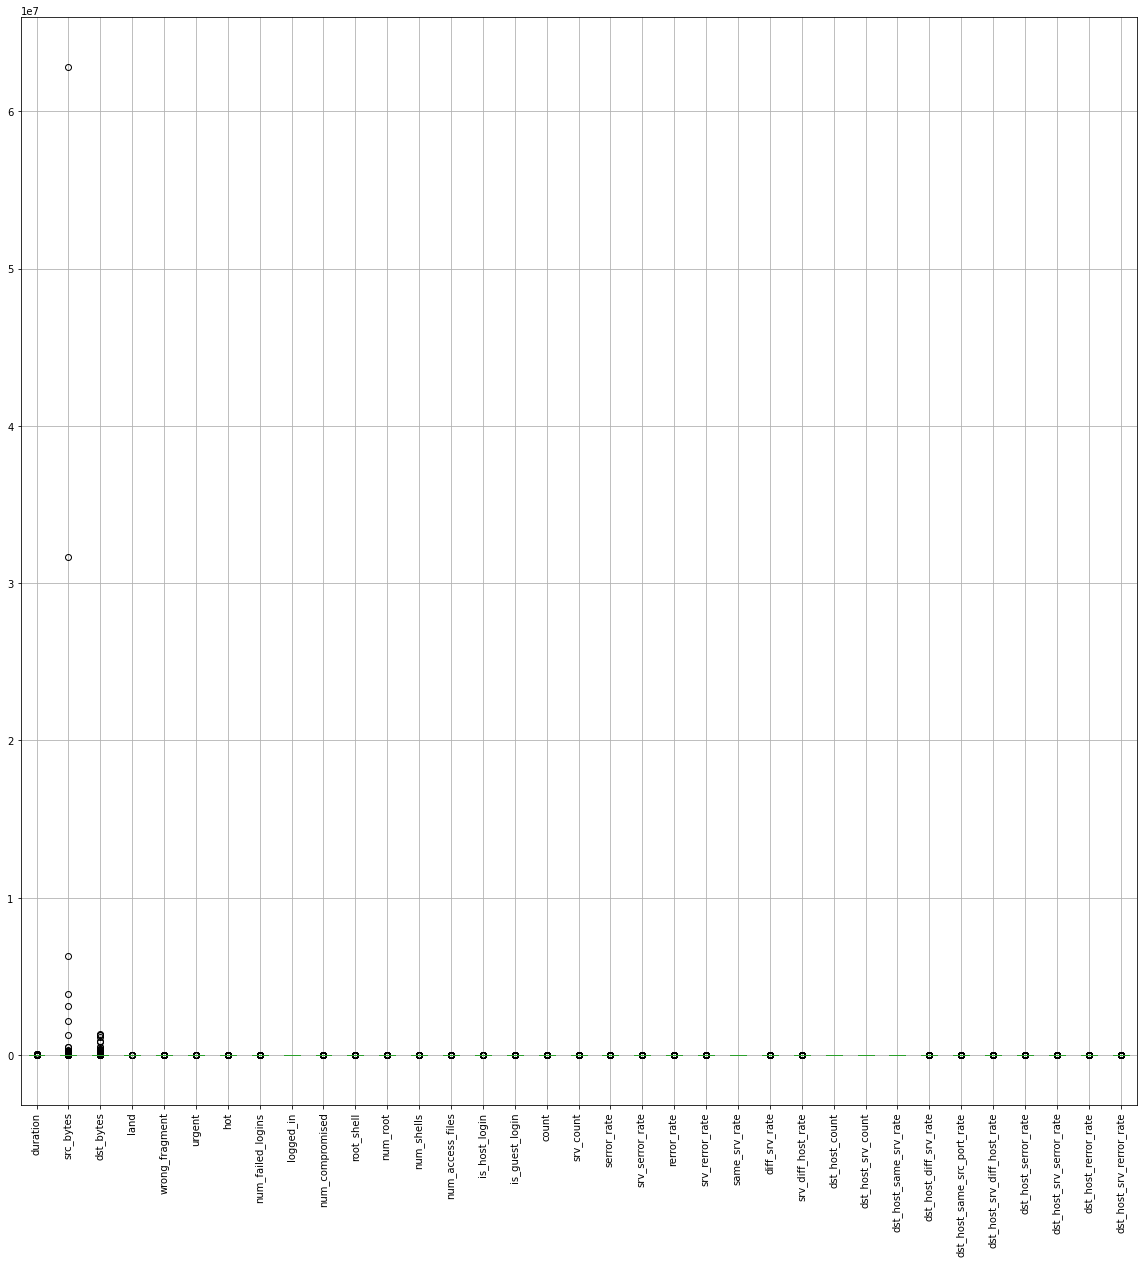

In [53]:
ni_df2_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [54]:
no_outlier = ['logged_in','same_srv_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate']

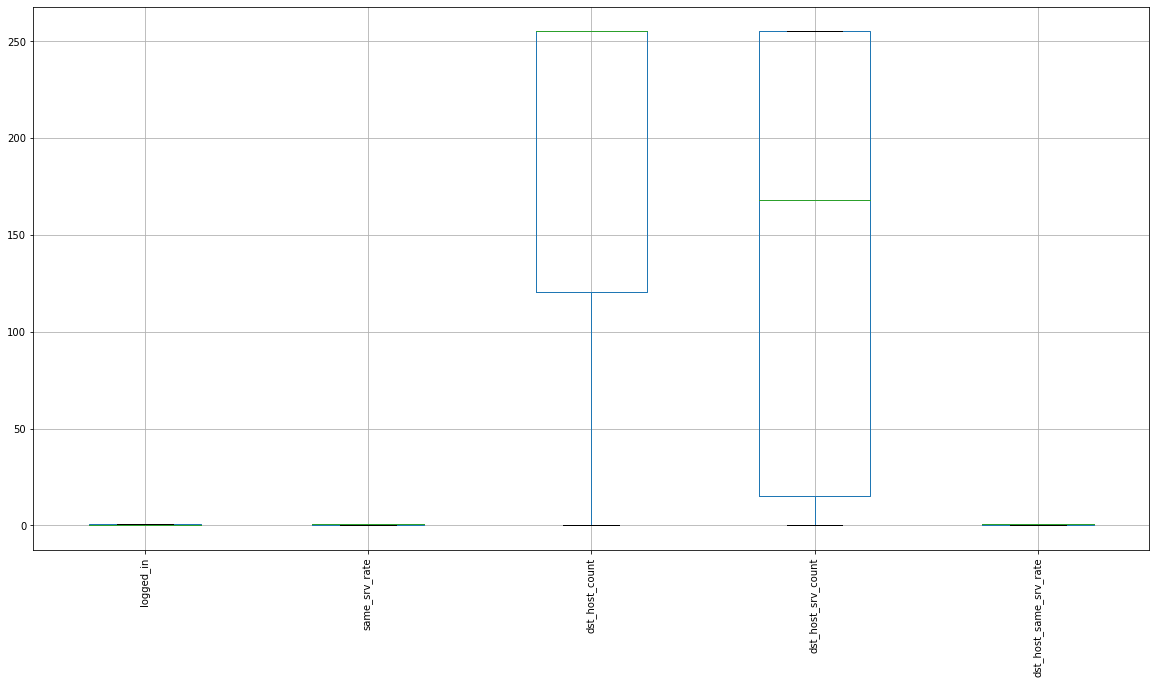

In [55]:
ni_df2_num[no_outlier].boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

In [56]:
outlier_list = [x for x in ni_df2_num.columns if x not in no_outlier]

In [57]:
outlier_list

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'root_shell',
 'num_root',
 'num_shells',
 'num_access_files',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [58]:
for column in ni_df2_num[outlier_list].columns:
    lr,ur=treat_outlier1(ni_df2_num[column])
    ni_df2_num[column]=np.where(ni_df2_num[column]>ur,ur,ni_df2_num[column])
    ni_df2_num[column]=np.where(ni_df2_num[column]<lr,lr,ni_df2_num[column])

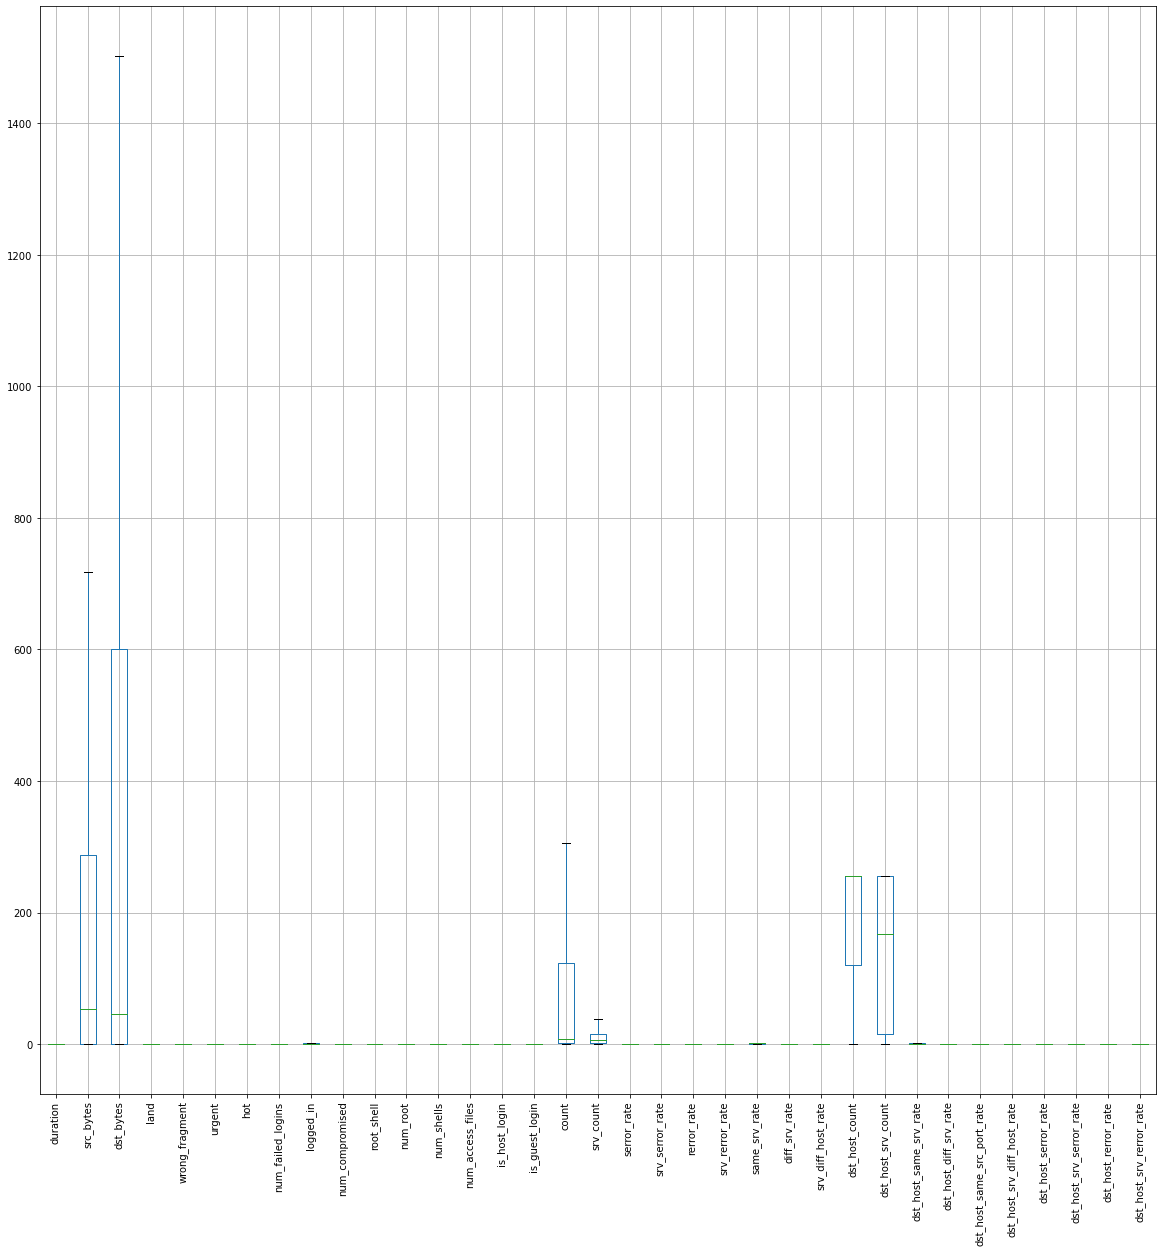

In [59]:
ni_df2_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [60]:
ni_df2_num_scaled=ni_df2_num.apply(zscore)
ni_df2_num_scaled.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,NaN,-0.793424,-0.699266,NaN,NaN,NaN,NaN,NaN,-0.890369,NaN,...,0.650247,-1.169631,-1.305347,0.466549,-0.656920,-0.589104,NaN,NaN,1.896295,1.770688
1,NaN,-0.793424,-0.699266,NaN,NaN,NaN,NaN,NaN,-0.890369,NaN,...,0.650247,-1.250149,-1.397163,0.466549,-0.656920,-0.589104,NaN,NaN,1.896295,1.770688
2,NaN,2.281565,-0.699266,NaN,NaN,NaN,NaN,NaN,-0.890369,NaN,...,-0.636447,-0.489704,0.003026,0.051458,1.904431,1.435482,NaN,NaN,-0.609467,-0.594064
3,NaN,-0.707710,-0.699266,NaN,NaN,NaN,NaN,NaN,-0.890369,NaN,...,-2.029480,-0.749150,0.898230,-0.778724,1.904431,1.941629,NaN,NaN,-0.609467,-0.594064
4,NaN,-0.793424,-0.673446,NaN,NaN,NaN,NaN,NaN,-0.890369,NaN,...,-1.753000,-0.489704,-0.685591,2.334459,0.367620,1.435482,NaN,NaN,1.701403,1.770688


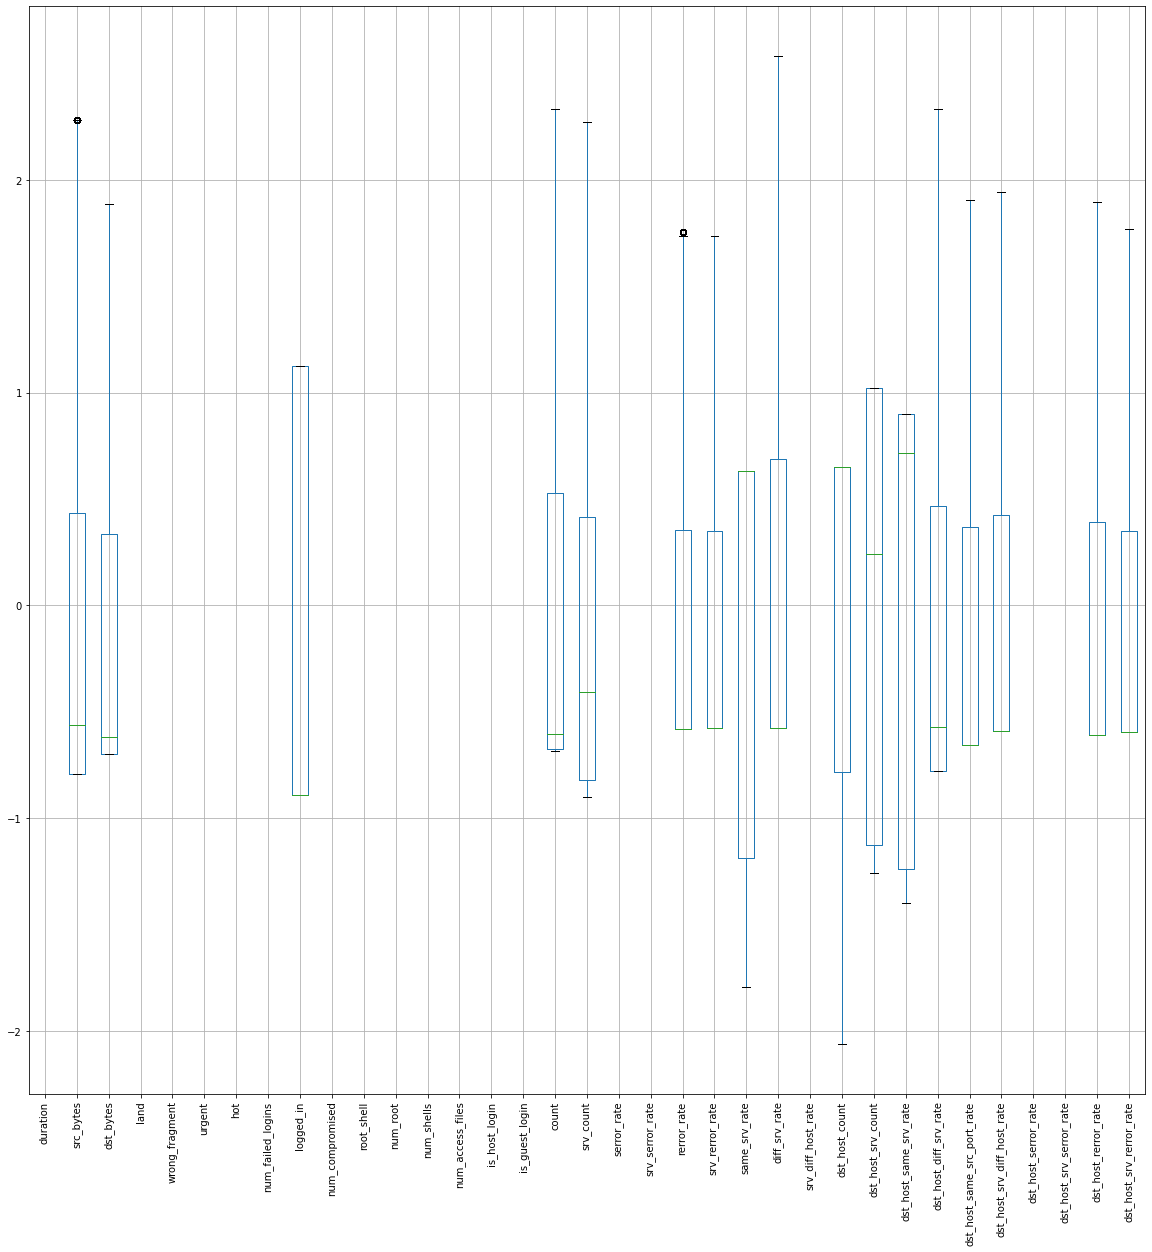

In [61]:
ni_df2_num_scaled.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [62]:
vif_cal(ni_df2_num)

duration  VIF =  nan
src_bytes  VIF =  1.67
dst_bytes  VIF =  2.44
land  VIF =  nan
wrong_fragment  VIF =  nan
urgent  VIF =  nan
hot  VIF =  nan
num_failed_logins  VIF =  nan
logged_in  VIF =  3.49
num_compromised  VIF =  nan
root_shell  VIF =  nan
num_root  VIF =  nan
num_shells  VIF =  nan
num_access_files  VIF =  nan
is_host_login  VIF =  nan
is_guest_login  VIF =  nan
count  VIF =  3.46
srv_count  VIF =  1.82
serror_rate  VIF =  nan
srv_serror_rate  VIF =  nan
rerror_rate  VIF =  20.93
srv_rerror_rate  VIF =  21.54
same_srv_rate  VIF =  9.51
diff_srv_rate  VIF =  4.47
srv_diff_host_rate  VIF =  nan
dst_host_count  VIF =  5.79
dst_host_srv_count  VIF =  9.08
dst_host_same_srv_rate  VIF =  11.62
dst_host_diff_srv_rate  VIF =  3.22
dst_host_same_src_port_rate  VIF =  2.45
dst_host_srv_diff_host_rate  VIF =  3.62
dst_host_serror_rate  VIF =  nan
dst_host_srv_serror_rate  VIF =  nan
dst_host_rerror_rate  VIF =  6.76
dst_host_srv_rerror_rate  VIF =  12.21


#### High Multicolinearity
-	srv_rerror_rate  VIF =  21.54
-	rerror_rate  VIF =  20.93
-	dst_host_srv_rerror_rate  VIF =  12.21
-	dst_host_same_srv_rate  VIF =  11.62

#### Good Multicollinearity

- dst_host_srv_count  VIF =  9.08
- dst_host_rerror_rate  VIF =  6.76
- same_srv_rate  VIF =  9.51
- dst_host_count  VIF =  5.79

#### moderate Multicolinearity

-	diff_srv_rate  VIF =  4.47
-	count  VIF =  3.56
-   logged_in  VIF =  3.49
-	srv_count  VIF =  2.3
-	dst_host_count  VIF =  3.74
-   dst_host_diff_srv_rate  VIF =  3.22
-   dst_host_same_src_port_rate  VIF =  2.45
-   dst_host_srv_diff_host_rate  VIF =  3.62
-	dst_host_diff_srv_rate  VIF =  2.33
-	dst_host_serror_rate  VIF =  4.3
-	dst_host_srv_serror_rate  VIF =  4.56
-   diff_srv_rate  VIF =  4.47
-   dst_bytes  VIF =  2.44
#### low or no Multicolinearity
-   src_bytes  VIF =  1.67
-   srv_count  VIF =  1.82
-   duration  VIF =  nan
-   land  VIF =  nan
-   wrong_fragment  VIF =  nan
-   urgent  VIF =  nan
-   hot  VIF =  nan
-   num_failed_logins  VIF =  nan
-   num_compromised  VIF =  nan
-   root_shell  VIF =  nan
-   num_root  VIF =  nan
-   num_shells  VIF =  nan
-   num_access_files  VIF =  nan
-   is_host_login  VIF =  nan
-   is_guest_login  VIF =  nan
-   serror_rate  VIF =  nan
-   srv_serror_rate  VIF =  nan
-   srv_diff_host_rate  VIF =  nan
-   dst_host_serror_rate  VIF =  nan
-   dst_host_srv_serror_rate  VIF =  nan

In [63]:
ni_df2_num_scaled.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,NaN,-0.793424,-0.699266,NaN,NaN,NaN,NaN,NaN,-0.890369,NaN,...,0.650247,-1.169631,-1.305347,0.466549,-0.656920,-0.589104,NaN,NaN,1.896295,1.770688
1,NaN,-0.793424,-0.699266,NaN,NaN,NaN,NaN,NaN,-0.890369,NaN,...,0.650247,-1.250149,-1.397163,0.466549,-0.656920,-0.589104,NaN,NaN,1.896295,1.770688
2,NaN,2.281565,-0.699266,NaN,NaN,NaN,NaN,NaN,-0.890369,NaN,...,-0.636447,-0.489704,0.003026,0.051458,1.904431,1.435482,NaN,NaN,-0.609467,-0.594064
3,NaN,-0.707710,-0.699266,NaN,NaN,NaN,NaN,NaN,-0.890369,NaN,...,-2.029480,-0.749150,0.898230,-0.778724,1.904431,1.941629,NaN,NaN,-0.609467,-0.594064
4,NaN,-0.793424,-0.673446,NaN,NaN,NaN,NaN,NaN,-0.890369,NaN,...,-1.753000,-0.489704,-0.685591,2.334459,0.367620,1.435482,NaN,NaN,1.701403,1.770688


In [64]:
ni_df3= ni_df2_num_scaled.copy()

In [65]:
ni_df3.shape

(22526, 35)

In [66]:
ni_df3.isnull().sum()

duration                       22526
src_bytes                          0
dst_bytes                          0
land                           22526
wrong_fragment                 22526
urgent                         22526
hot                            22526
num_failed_logins              22526
logged_in                          0
num_compromised                22526
root_shell                     22526
num_root                       22526
num_shells                     22526
num_access_files               22526
is_host_login                  22526
is_guest_login                 22526
count                              0
srv_count                          0
serror_rate                    22526
srv_serror_rate                22526
rerror_rate                        0
srv_rerror_rate                    0
same_srv_rate                      0
diff_srv_rate                      0
srv_diff_host_rate             22526
dst_host_count                     0
dst_host_srv_count                 0
d

### Drop columns where the null values are present

In [67]:
ni_df3.drop(['duration','land','wrong_fragment','urgent','hot','num_failed_logins','num_compromised','root_shell','num_root','num_shells','num_access_files','num_access_files','is_host_login','is_guest_login','serror_rate','srv_serror_rate','srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate'],axis=1, inplace=True)

In [68]:
ni_df3.isnull().sum()

src_bytes                      0
dst_bytes                      0
logged_in                      0
count                          0
srv_count                      0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
dtype: int64

### Statistical tests to be done before PCA

#### Bartletts Test of Sphericity
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

- H0: All variables in the data are uncorrelated
- Ha: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [69]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(ni_df3)
p_value

0.0

### We reject Null hypothesis which means at least one pair of variables in the data afre correlated

#### KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [70]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(ni_df3)
kmo_model

0.8236684624058852

In [71]:
cov_matrix=np.cov(ni_df3.T)
print('Covariance matrix \n%s',cov_matrix)

Covariance matrix 
%s [[ 1.0000444   0.32867772  0.48205107 -0.27408868  0.14401668 -0.2717908
  -0.26819309  0.48554084 -0.41404768 -0.17589148  0.39494461  0.43635923
  -0.27637678  0.20808872  0.14321334 -0.32816302 -0.33309356]
 [ 0.32867772  1.0000444   0.73021978 -0.41482219 -0.02252558 -0.37623746
  -0.36765467  0.43177121 -0.38127069 -0.3408949   0.52626798  0.50367853
  -0.41629063  0.01047224  0.36554661 -0.38002645 -0.38423535]
 [ 0.48205107  0.73021978  1.0000444  -0.53377095 -0.05471205 -0.36721132
  -0.36477657  0.52978768 -0.43988137 -0.31281788  0.58197044  0.56587768
  -0.41895606 -0.08013622  0.34622652 -0.39354529 -0.41160669]
 [-0.27408868 -0.41482219 -0.53377095  1.0000444   0.31806399  0.43952726
   0.41433641 -0.67368363  0.45317231  0.38778638 -0.38692547 -0.46388259
   0.33061534 -0.04459439 -0.36513142  0.47117893  0.42351317]
 [ 0.14401668 -0.02252558 -0.05471205  0.31806399  1.0000444  -0.05706984
  -0.04634296  0.1424025  -0.19363164  0.12909578  0.34825099

In [72]:
ni_df3.cov()

,src_bytes,dst_bytes,logged_in,count,srv_count,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
src_bytes,1.000044,0.328678,0.482051,-0.274089,0.144017,-0.271791,-0.268193,0.485541,-0.414048,-0.175891,0.394945,0.436359,-0.276377,0.208089,0.143213,-0.328163,-0.333094
dst_bytes,0.328678,1.000044,0.730220,-0.414822,-0.022526,-0.376237,-0.367655,0.431771,-0.381271,-0.340895,0.526268,0.503679,-0.416291,0.010472,0.365547,-0.380026,-0.384235
logged_in,0.482051,0.730220,1.000044,-0.533771,-0.054712,-0.367211,-0.364777,0.529788,-0.439881,-0.312818,0.581970,0.565878,-0.418956,-0.080136,0.346227,-0.393545,-0.411607
count,-0.274089,-0.414822,-0.533771,1.000044,0.318064,0.439527,0.414336,-0.673684,0.453172,0.387786,-0.386925,-0.463883,0.330615,-0.044594,-0.365131,0.471179,0.423513
srv_count,0.144017,-0.022526,-0.054712,0.318064,1.000044,-0.057070,-0.046343,0.142402,-0.193632,0.129096,0.348251,0.305904,-0.320183,0.132572,-0.081887,-0.087980,-0.039639
rerror_rate,-0.271791,-0.376237,-0.367211,0.439527,-0.057070,1.000044,0.969040,-0.638802,0.543588,0.277451,-0.505344,-0.580075,0.377871,-0.293379,-0.225902,0.870427,0.927616
srv_rerror_rate,-0.268193,-0.367655,-0.364777,0.414336,-0.046343,0.969040,1.000044,-0.611658,0.504042,0.265444,-0.491893,-0.565237,0.350446,-0.286163,-0.211758,0.844503,0.938414
same_srv_rate,0.485541,0.431771,0.529788,-0.673684,0.142402,-0.638802,-0.611658,1.000044,-0.830636,-0.351910,0.713400,0.796927,-0.574730,0.259728,0.312413,-0.659241,-0.618941
diff_srv_rate,-0.414048,-0.381271,-0.439881,0.453172,-0.193632,0.543588,0.504042,-0.830636,1.000044,0.270456,-0.605288,-0.678566,0.600921,-0.141496,-0.212847,0.527759,0.511391
dst_host_count,-0.175891,-0.340895,-0.312818,0.387786,0.129096,0.277451,0.265444,-0.351910,0.270456,1.000044,-0.119128,-0.339031,0.177141,-0.574158,-0.812028,0.299278,0.271973


In [73]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[-1.82991204e-01 -6.69638567e-02  1.51138555e-01  7.54017358e-02
  -8.29326449e-01  2.85782176e-02  2.66049425e-01 -3.22407549e-01
   3.19450661e-02  2.67722104e-02  2.26027111e-01  7.57247590e-02
  -8.79415550e-02 -2.45486360e-03 -1.68940692e-02 -2.02071768e-02
   5.63964828e-02]
 [-2.21639748e-01  3.48690583e-02  3.10120412e-01 -1.81457005e-01
   2.41639302e-02  5.12177951e-01 -3.65509875e-01  1.70249919e-01
  -3.48619047e-01  3.14106796e-01  3.95198384e-01  1.00919674e-01
   3.39445526e-02  7.40449653e-03  4.23010645e-02  3.48333686e-02
  -6.55082952e-02]
 [-2.38273315e-01 -7.87988391e-03  3.56708877e-01 -2.49957044e-01
  -1.55747643e-01  3.11730500e-01 -5.89139115e-02  6.33437393e-02
   1.67045625e-01 -1.10134794e-01 -7.06038235e-01 -2.70276680e-01
   5.32066695e-02  4.66527423e-03  5.50721916e-02  5.99745669e-02
   5.89192816e-02]
 [ 2.26169806e-01 -1.75086897e-01 -1.62951175e-01  3.43671725e-01
  -2.44163939e-02  4.27560869e-01 -1.74817771e-01 -3.08326735e-01
  -

In [74]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print('The variance explained by each of eigen values in order is ',var_exp)

The variance explained by each of eigen values in order is  [46.31847849679409, 11.821113500876793, 10.50899557663804, 8.760962393348635, 5.089847148841346, 4.859905396494827, 2.4491329701174682, 2.2379362348272083, 2.0960912139739065, 1.6959138446292463, 1.2062964140719215, 0.9283011069082464, 0.7755627038475255, 0.4379710643855188, 0.3934717825295088, 0.27197082450045373, 0.14804932721525027]


In [75]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 46.3184785   58.139592    68.64858757  77.40954997  82.49939712
  87.35930251  89.80843548  92.04637172  94.14246293  95.83837678
  97.04467319  97.9729743   98.748537    99.18650807  99.57997985
  99.85195067 100.        ]


In [76]:
cum_var_exp

array([ 46.3184785 ,  58.139592  ,  68.64858757,  77.40954997,
        82.49939712,  87.35930251,  89.80843548,  92.04637172,
        94.14246293,  95.83837678,  97.04467319,  97.9729743 ,
        98.748537  ,  99.18650807,  99.57997985,  99.85195067,
       100.        ])

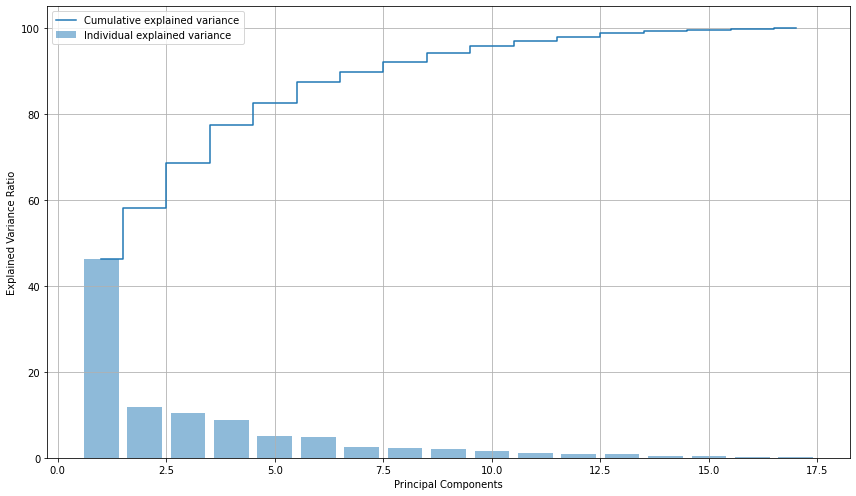

In [77]:
# Let us now plot one more graph with both the variance explained by each eigen value 
#and the cumulative variance explained.

plt.figure(figsize=(12, 7))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.grid()
plt.show()

In [78]:
# NOTE - we are generating only 6 PCA dimensions (dimensionality reduction from 43 to 6)
pca = PCA(n_components=6, random_state=123)
ni_df_pca = pca.fit_transform(ni_df3)
ni_df_pca.transpose() # Component output

array([[ 4.79197786,  4.69620625, -1.59167752, ..., -2.59084572,
        -1.11637131,  4.05820161],
       [-0.37971995,  0.09907872,  2.0490652 , ..., -1.51377578,
        -1.19618762,  0.0540944 ],
       [-0.99299832, -1.14576098,  0.88130298, ..., -1.1856454 ,
         0.98120035, -1.0230878 ],
       [ 0.5166075 , -0.24983062,  0.91853763, ..., -1.07952898,
        -0.63755589, -0.31716293],
       [-0.1940892 , -0.19153856,  1.90363838, ...,  1.55237189,
        -1.02033395, -0.60205397],
       [ 0.12472347, -0.39896636, -1.18594118, ...,  0.7100406 ,
        -1.2720641 , -0.22694369]])

In [79]:
# Loading of each feature on the components
pca.components_

array([[-1.82991204e-01, -2.21639748e-01, -2.38273315e-01,
         2.26169806e-01, -5.09303982e-02,  2.90960170e-01,
         2.84184301e-01, -3.13130717e-01,  2.71001982e-01,
         1.66316455e-01, -2.80926909e-01, -3.10439079e-01,
         2.39156325e-01, -1.08070558e-01, -1.59019682e-01,
         2.97462404e-01,  2.90444621e-01],
       [-6.69638568e-02,  3.48690584e-02, -7.87988387e-03,
        -1.75086897e-01, -3.73488742e-01, -2.60592331e-02,
        -2.79911484e-02, -5.57254657e-02,  1.38840290e-01,
        -5.34172259e-01, -2.83456566e-01, -1.56833945e-01,
         2.37330327e-01,  3.71046266e-01,  4.63982012e-01,
        -5.03108186e-04, -2.60577355e-02],
       [-1.51138555e-01, -3.10120412e-01, -3.56708877e-01,
         1.62951175e-01,  4.09931904e-02, -3.78586344e-01,
        -3.90313130e-01, -4.97089888e-02,  6.43573962e-02,
         1.45864897e-01, -1.55412574e-01, -1.19343305e-01,
         1.93276343e-01,  2.17696094e-01, -2.41145338e-01,
        -2.97830497e-01, -3.6

In [80]:
var_exp = pca.explained_variance_ratio_

In [81]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)*100
pca.explained_variance_ratio_*100

array([46.3184785 , 11.8211135 , 10.50899558,  8.76096239,  5.08984715,
        4.8599054 ])

In [82]:
pca.explained_variance_ratio_.sum()*100

87.35930251299216

#### Let's create a dataframe of component loading against each field and identify the pattern

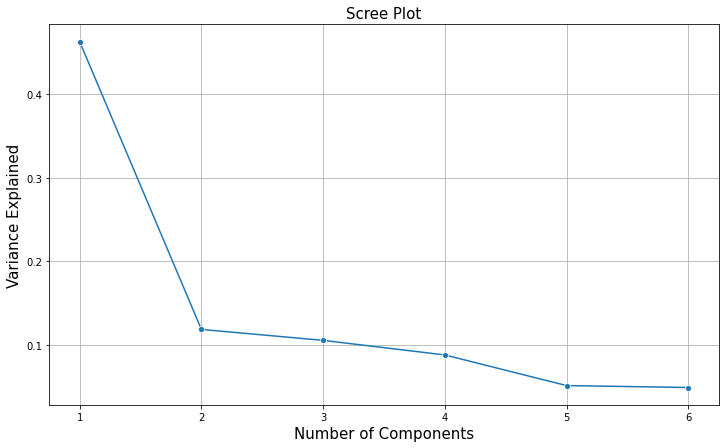

In [83]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [84]:
ni_df_pca_loading = pd.DataFrame(pca.components_,columns=list(ni_df3))
ni_df_pca_loading.shape

(6, 17)

In [85]:
ni_df_pca_loading.head()

,src_bytes,dst_bytes,logged_in,count,srv_count,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.182991,-0.221640,-0.238273,0.226170,-0.050930,0.290960,0.284184,-0.313131,0.271002,0.166316,-0.280927,-0.310439,0.239156,-0.108071,-0.159020,0.297462,0.290445
1,-0.066964,0.034869,-0.007880,-0.175087,-0.373489,-0.026059,-0.027991,-0.055725,0.138840,-0.534172,-0.283457,-0.156834,0.237330,0.371046,0.463982,-0.000503,-0.026058
2,-0.151139,-0.310120,-0.356709,0.162951,0.040993,-0.378586,-0.390313,-0.049709,0.064357,0.145865,-0.155413,-0.119343,0.193276,0.217696,-0.241145,-0.297830,-0.363248
3,0.075402,-0.181457,-0.249957,0.343672,0.577128,0.119434,0.130441,0.022485,-0.067704,-0.225927,0.089350,0.157588,-0.172698,0.481630,0.210390,0.066463,0.130458
4,0.829326,-0.024164,0.155748,0.024416,-0.014521,0.052339,0.039221,0.089282,-0.043060,0.080076,-0.129640,-0.111452,0.346437,0.233966,-0.239856,0.061647,-0.027130


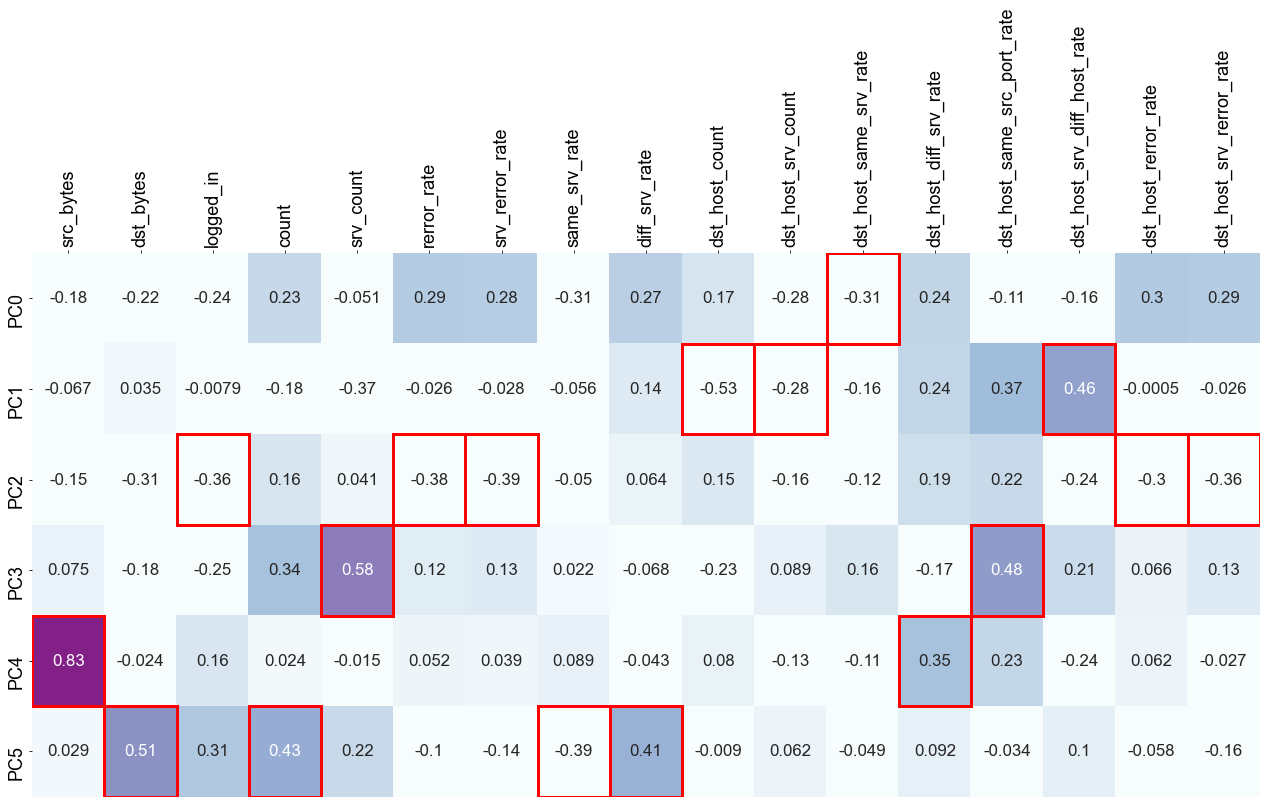

In [86]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.4)
ax = sns.heatmap(ni_df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='BuPu', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5'])
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
column_max = ni_df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(ni_df_pca_loading.columns):
    position = ni_df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

### Following are the interpreation of the principal components, will be good if we could have some naming conventions for the combinations
- PC0= dst_host_same_srv_rate
- PC1= dst_host + dst_host_srv_count + dst_host_srv_diff_host_rate
- PC2= logged_in + rerror_rate + srv_rerror_rate
- PC3= srv_count + dst_host_same_src_port_rate
- PC4=src_bytes + dst_host_diff_srv_rate
- PC5= dst_bytes + count + same_srv_rate + diff_srv_rate

### Network Intrusions are classified into the below seven categories 
- Scanning Attacks
- Asymmetric Routing
- Buffer Overflow Attacks
- Protocol-Specific Attacks
- Malware
- Traffic Flooding
- DoS
### Note as I have limited knowledge on understanding the logs with respect to attacks and this will definietly require SME to identify, I am just going to classify each of these Principle components to intrusion types based on my limited knowledge, anyone using this notebook who has a better understanding to map the principle components with the corresponding intrussion type or attack.
- PC0 = Scanning Attacks
- PC1 = Asymmetric Routing
- PC2 = Buffer Overflow Attacks
- PC3 = Malware
- PC4 = Traffic Flooding
- PC5 = DoS

In [87]:
ni_df_pca1 = pd.DataFrame(ni_df_pca,columns=['Scanning_Attacks','Asymmetric_Routing','Buffer_Overflow_Attacks','Malware','Traffic_Flooding','DoS'])
ni_df_pca1.head()

,Scanning_Attacks,Asymmetric_Routing,Buffer_Overflow_Attacks,Malware,Traffic_Flooding,DoS
0,4.791978,-0.379720,-0.992998,0.516607,-0.194089,0.124723
1,4.696206,0.099079,-1.145761,-0.249831,-0.191539,-0.398966
2,-1.591678,2.049065,0.881303,0.918538,1.903638,-1.185941
3,-1.917754,1.810407,0.907529,3.158678,-1.207006,-0.677207
4,2.387853,2.528056,-1.947466,1.067173,0.054528,-1.908262


In [88]:
vif_cal(ni_df_pca1)

Scanning_Attacks  VIF =  1.0
Asymmetric_Routing  VIF =  1.0
Buffer_Overflow_Attacks  VIF =  1.0
Malware  VIF =  1.0
Traffic_Flooding  VIF =  1.0
DoS  VIF =  1.0


In [89]:
ni_df_pca1.shape

(22526, 6)

In [90]:
ni_df2_cat

,protocol_type,service,flag
0,tcp,private,REJ
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO
...,...,...,...
22539,tcp,smtp,SF
22540,tcp,http,SF
22541,tcp,http,SF
22542,udp,domain_u,SF


In [91]:
LE = LabelEncoder()

In [92]:
ni_df2_cat=ni_df2_cat.apply(LE.fit_transform)

In [93]:
ni_df_new = pd.concat([ni_df2_cat, ni_df_pca1], axis=1)

In [94]:
ni_df_new.head()

,protocol_type,service,flag,Scanning_Attacks,Asymmetric_Routing,Buffer_Overflow_Attacks,Malware,Traffic_Flooding,DoS
0,1.0,45.0,1.0,4.791978,-0.379720,-0.992998,0.516607,-0.194089,0.124723
1,1.0,45.0,1.0,4.696206,0.099079,-1.145761,-0.249831,-0.191539,-0.398966
2,1.0,19.0,9.0,-1.591678,2.049065,0.881303,0.918538,1.903638,-1.185941
3,0.0,13.0,9.0,-1.917754,1.810407,0.907529,3.158678,-1.207006,-0.677207
4,1.0,55.0,2.0,2.387853,2.528056,-1.947466,1.067173,0.054528,-1.908262


In [95]:
ni_df_new=pd.concat([ni_df_new,ni_df1.class_target],axis=1)

In [96]:
ni_df_new.head()

,protocol_type,service,flag,Scanning_Attacks,Asymmetric_Routing,Buffer_Overflow_Attacks,Malware,Traffic_Flooding,DoS,class_target
0,1.0,45.0,1.0,4.791978,-0.379720,-0.992998,0.516607,-0.194089,0.124723,1.0
1,1.0,45.0,1.0,4.696206,0.099079,-1.145761,-0.249831,-0.191539,-0.398966,1.0
2,1.0,19.0,9.0,-1.591678,2.049065,0.881303,0.918538,1.903638,-1.185941,0.0
3,0.0,13.0,9.0,-1.917754,1.810407,0.907529,3.158678,-1.207006,-0.677207,1.0
4,1.0,55.0,2.0,2.387853,2.528056,-1.947466,1.067173,0.054528,-1.908262,1.0


In [97]:
ni_df_new.shape

(22544, 10)

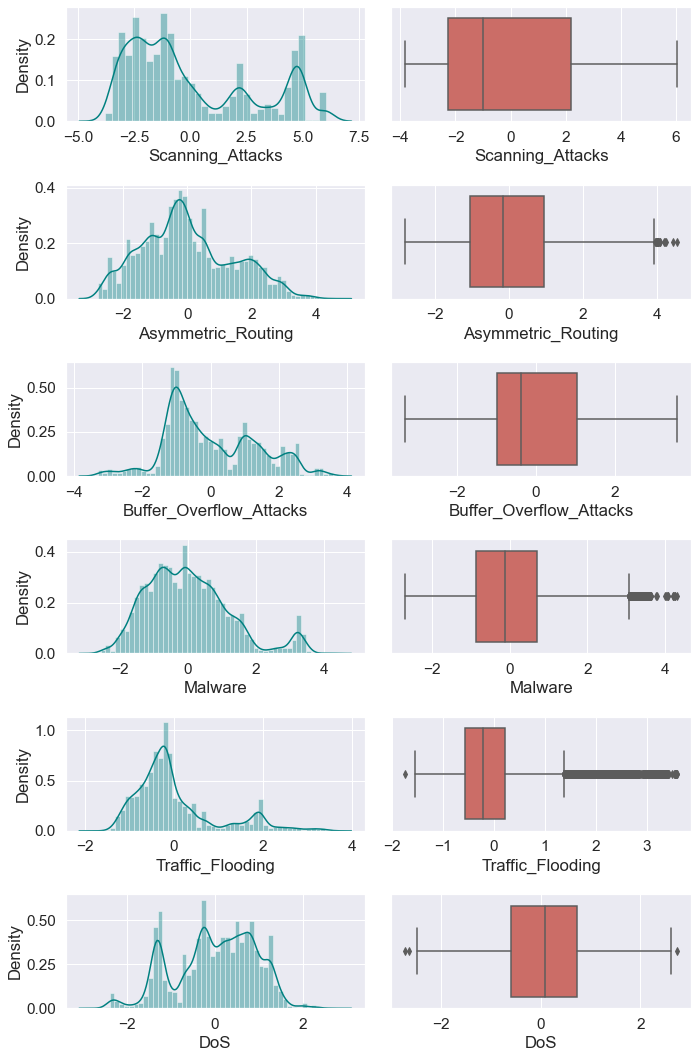

In [98]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(10, 15)
a = sns.distplot(ni_df_new.Scanning_Attacks , ax=axes[0][0],color='teal')
#a.set_title("Scan Attacks",fontsize=15)
a = sns.boxplot(ni_df_new.Scanning_Attacks, orient = "v" , ax=axes[0][1],palette='hls')
#a.set_title("Scan Attacks",fontsize=15)
a = sns.distplot(ni_df_new.Asymmetric_Routing , ax=axes[1][0],color='teal')
#a.set_title("Asymetric Routing",fontsize=15)
a = sns.boxplot(ni_df_new.Asymmetric_Routing, orient = "v" , ax=axes[1][1],palette='hls')
#a.set_title("Asymetric Routing",fontsize=15)

a = sns.distplot(ni_df_new.Buffer_Overflow_Attacks , ax=axes[2][0],color='teal')
#a.set_title("Buffer Overflow",fontsize=15)
a = sns.boxplot(ni_df_new.Buffer_Overflow_Attacks, orient = "v" , ax=axes[2][1],palette='hls')
#a.set_title("Buffer Overflow",fontsize=15)

a = sns.distplot(ni_df_new.Malware , ax=axes[3][0],color='teal')
#a.set_title("Malware",fontsize=15)
a = sns.boxplot(ni_df_new.Malware , orient = "v" , ax=axes[3][1],palette='hls')
#a.set_title("Malware",fontsize=15)
a = sns.distplot(ni_df_new.Traffic_Flooding , ax=axes[4][0],color='teal')
#a.set_title("Traffic Flooding",fontsize=15)
a = sns.boxplot(ni_df_new.Traffic_Flooding , orient = "v" , ax=axes[4][1],palette='hls')
#a.set_title("Traffic Flooding",fontsize=15)
a = sns.distplot(ni_df_new.DoS , ax=axes[5][0],color='teal')
#a.set_title("DoS",fontsize=15)
a = sns.boxplot(ni_df_new.DoS , orient = "v" , ax=axes[5][1],palette='hls')
#a.set_title("DoS",fontsize=15)
fig.tight_layout()

In [99]:
ni_df_new_copy=ni_df_new.copy()

In [100]:
ni_df_new.shape

(22544, 10)

In [101]:
ni_df_new.isnull().sum()

protocol_type              18
service                    18
flag                       18
Scanning_Attacks           18
Asymmetric_Routing         18
Buffer_Overflow_Attacks    18
Malware                    18
Traffic_Flooding           18
DoS                        18
class_target               18
dtype: int64

In [102]:
ni_df_new.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
protocol_type,22526.0,1.069964e+00,0.396977,0.000000,1.000000,1.000000,1.000000,2.000000
service,22526.0,3.163047e+01,14.316927,0.000000,22.000000,22.000000,45.000000,63.000000
flag,22526.0,6.874057e+00,3.209971,0.000000,5.000000,9.000000,9.000000,10.000000
Scanning_Attacks,22526.0,6.237673e-17,2.806152,-3.829334,-2.285634,-0.996333,2.200833,6.043248
Asymmetric_Routing,22526.0,-8.862291e-19,1.417631,-2.801003,-1.051587,-0.165717,0.944543,4.547782
Buffer_Overflow_Attacks,22526.0,-6.262316e-17,1.336641,-3.310367,-0.987176,-0.371798,1.033916,3.579289
Malware,22526.0,1.480807e-17,1.220422,-2.704289,-0.884636,-0.125079,0.695058,4.315578
Traffic_Flooding,22526.0,-1.317373e-16,0.930222,-1.746474,-0.568200,-0.219317,0.209244,3.601090
DoS,22526.0,-7.194936e-17,0.908967,-2.724641,-0.604900,0.090281,0.724134,2.740464
class_target,22526.0,5.692977e-01,0.495186,0.000000,0.000000,1.000000,1.000000,1.000000


In [103]:
ni_df_new1=ni_df_new.copy()

In [104]:
ni_df_new1.dropna(inplace= True)

In [105]:
ni_df_new1.shape

(22508, 10)

#### Splitting the transformded (PCA) data into train and test data

In [106]:
y=ni_df_new1['class_target']

In [107]:
ni_X=ni_df_new1.drop(['class_target'], axis=1)

In [108]:
ni_X.head()

,protocol_type,service,flag,Scanning_Attacks,Asymmetric_Routing,Buffer_Overflow_Attacks,Malware,Traffic_Flooding,DoS
0,1.0,45.0,1.0,4.791978,-0.379720,-0.992998,0.516607,-0.194089,0.124723
1,1.0,45.0,1.0,4.696206,0.099079,-1.145761,-0.249831,-0.191539,-0.398966
2,1.0,19.0,9.0,-1.591678,2.049065,0.881303,0.918538,1.903638,-1.185941
3,0.0,13.0,9.0,-1.917754,1.810407,0.907529,3.158678,-1.207006,-0.677207
4,1.0,55.0,2.0,2.387853,2.528056,-1.947466,1.067173,0.054528,-1.908262


In [109]:
X_train,X_test,y_train,y_test=train_test_split(ni_X,y,test_size=0.3,random_state=100,stratify=y)  

In [110]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((15755, 9), (6753, 9), (15755,), (6753,))

In [111]:
X_train.head()

,protocol_type,service,flag,Scanning_Attacks,Asymmetric_Routing,Buffer_Overflow_Attacks,Malware,Traffic_Flooding,DoS
7924,1.0,49.0,9.0,4.698630,0.639711,1.374048,-0.735506,0.386119,1.979483
13924,1.0,22.0,9.0,-2.355884,-1.113423,-0.704780,-1.690091,-0.158704,0.568727
17263,1.0,22.0,9.0,-0.510603,-0.017420,0.523664,-2.114772,0.307321,-0.248472
18759,1.0,43.0,5.0,-3.173406,1.060584,-1.086431,1.029384,-0.321068,0.576093
11119,1.0,22.0,9.0,-2.415110,-1.230431,-0.733873,-1.515304,0.080118,0.642982


In [112]:
DT_X_train=X_train.copy()

In [113]:
DT_X_test=X_test.copy()

In [114]:
DT_y_train=y_train.copy()

In [115]:
DT_y_test=y_test.copy()

In [116]:
RF_X_train=X_train.copy()

In [117]:
RF_X_test=X_test.copy()

In [118]:
RF_y_train=y_train.copy()

In [119]:
RF_y_test=y_test.copy()

In [120]:
LR_X_train=X_train.copy()

In [121]:
LR_X_test=X_test.copy()

In [122]:
LR_y_train=y_train.copy()

In [123]:
LR_y_test=y_test.copy()

In [124]:
NB_X_train=X_train.copy()

In [125]:
NB_X_test=X_test.copy()

In [126]:
NB_y_train=y_train.copy()

In [127]:
NB_y_test=y_test.copy()

In [128]:
KNN_X_train=X_train.copy()

In [129]:
KNN_X_test=X_test.copy()

In [130]:
KNN_y_train=y_train.copy()

In [131]:
KNN_y_test=y_test.copy()

In [132]:
NN_X_train=X_train.copy()

In [133]:
NN_X_test=X_test.copy()

In [134]:
NN_y_train=y_train.copy()

In [135]:
NN_y_test=y_test.copy()

### Decision Tree

In [136]:
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(DT_X_train, DT_y_train)

DecisionTreeClassifier(max_depth=3)

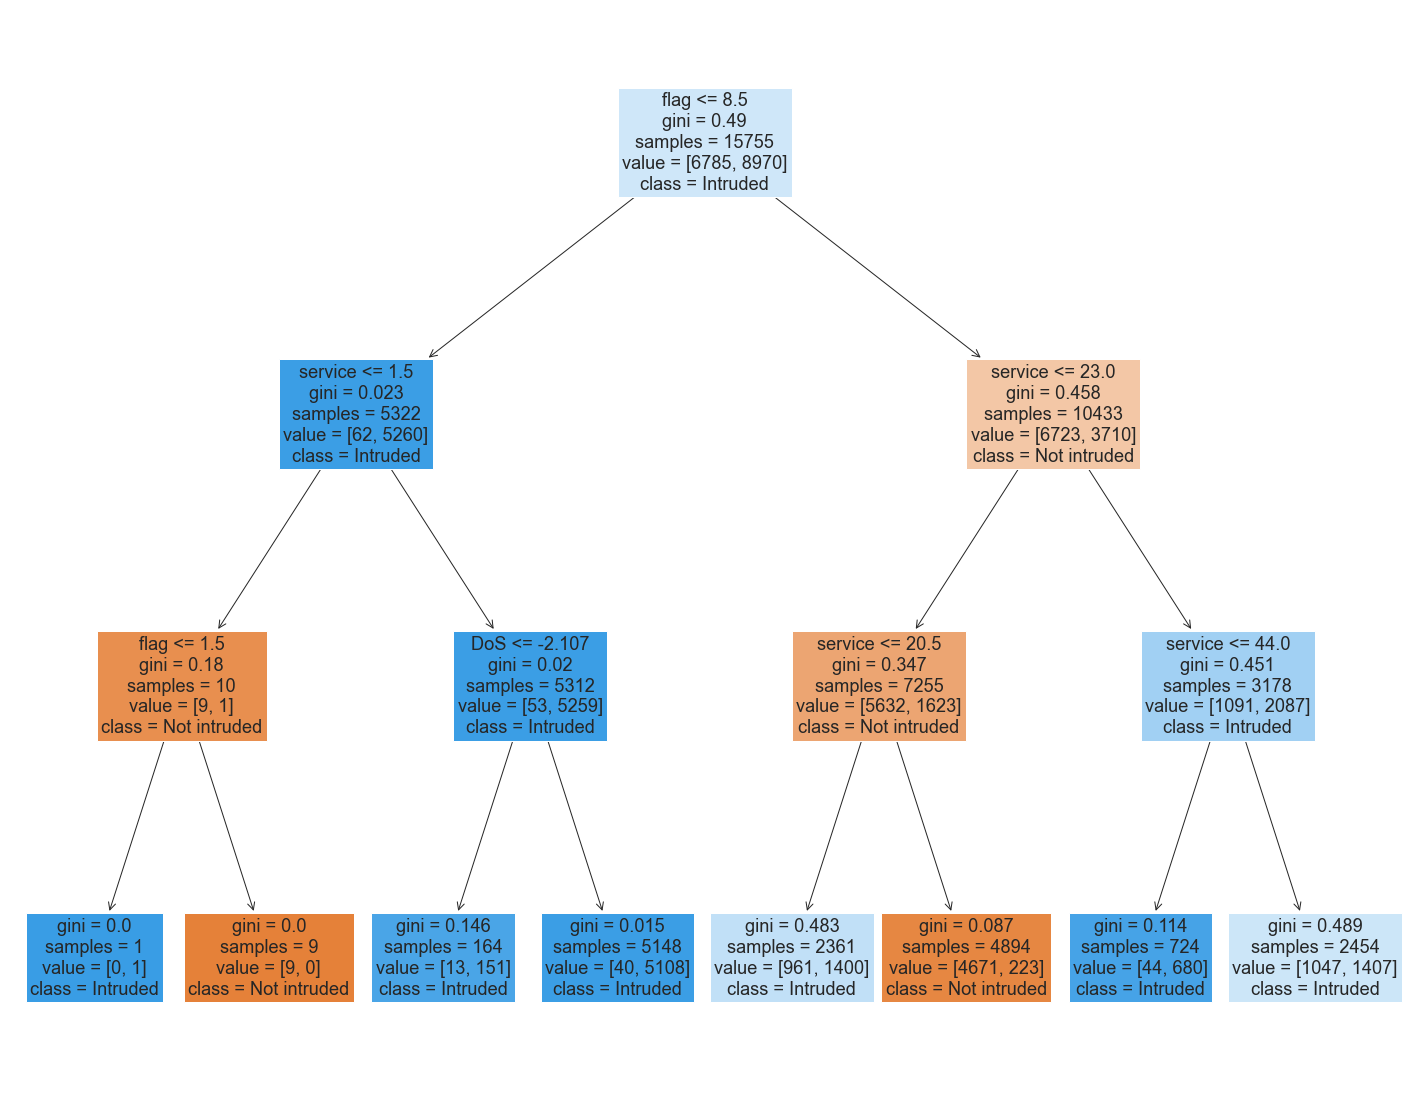

In [137]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model,
                   feature_names=DT_X_train.columns,
                   class_names=['Not intruded', "Intruded"],
                   filled=True)

In [138]:
y_train_pred = dt_model.predict(DT_X_train)
y_test_pred = dt_model.predict(DT_X_test)

In [139]:
print(classification_report(DT_y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.69      0.80      6785
         1.0       0.81      0.98      0.88      8970

    accuracy                           0.85     15755
   macro avg       0.88      0.83      0.84     15755
weighted avg       0.87      0.85      0.85     15755



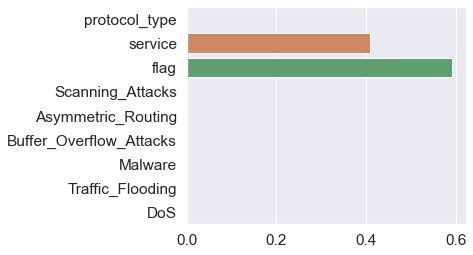

In [140]:
# Coefficient values- 
figure(figsize=(5, 4))
sns.barplot(x=[i for i in dt_model.feature_importances_],y=DT_X_train.columns)
plt.show()

In [141]:
print(classification_report(DT_y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.67      0.79      2908
         1.0       0.80      0.98      0.88      3845

    accuracy                           0.85      6753
   macro avg       0.88      0.83      0.83      6753
weighted avg       0.87      0.85      0.84      6753



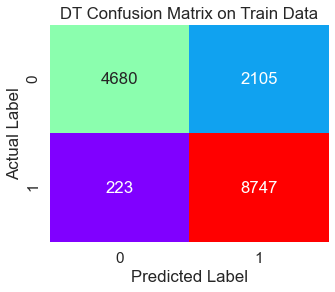

In [142]:
figure(figsize=(5, 4))
confusion_matrix(DT_y_train,y_train_pred)
sns.heatmap(confusion_matrix(DT_y_train,y_train_pred),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('DT Confusion Matrix on Train Data')
plt.show()

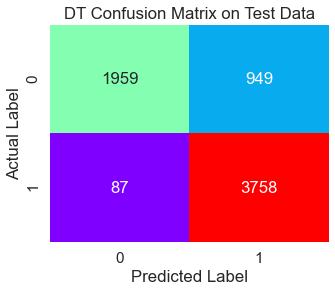

In [143]:
figure(figsize=(5, 4))
confusion_matrix(DT_y_test, y_test_pred)
sns.heatmap(confusion_matrix(DT_y_test,y_test_pred),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('DT Confusion Matrix on Test Data')
plt.show()

AUC: 0.931


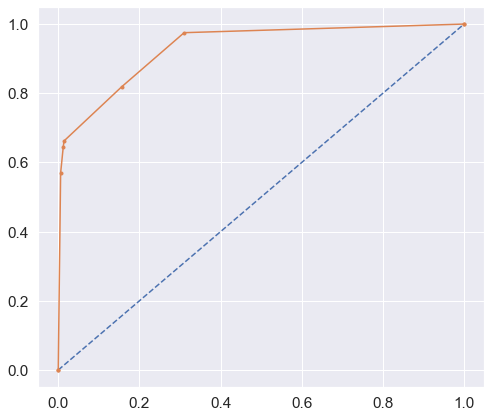

In [144]:
# predict probabilities
figure(figsize=(8, 7))
probs = dt_model.predict_proba(DT_X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(DT_y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(DT_y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.926


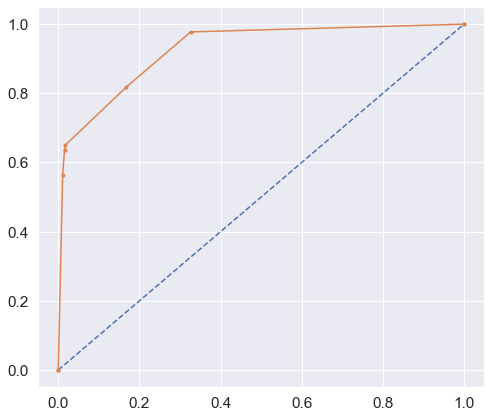

In [145]:
# predict probabilities
figure(figsize=(8, 7))
probs= dt_model.predict_proba(DT_X_test)
# keep probabilities for the positive outcome only
probs=probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(DT_y_test,probs)
print('AUC: %.3f'% auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr,tpr, thresholds=roc_curve(DT_y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr,tpr, marker='.')
# show the plot
plt.show()

In [146]:
dt = DecisionTreeClassifier(random_state=42)

In [147]:
params = {
    'max_depth': [140],
    'min_samples_leaf': [10],
    'criterion': ["entropy"]
}
#params1 = {
 #   'max_depth': [140,150,155,160,170,180,190],
  #  'min_samples_leaf': [6, 10,12,18,36,72],
   # 'criterion': ["gini", "entropy"]
#}

In [148]:
grid_search = GridSearchCV(estimator=dt,param_grid=params,cv=9, n_jobs=-1, verbose=1, scoring = "accuracy")

In [149]:
%%time
grid_search.fit(DT_X_train, DT_y_train)

Fitting 9 folds for each of 1 candidates, totalling 9 fits
Wall time: 3.37 s


GridSearchCV(cv=9, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [140],
                         'min_samples_leaf': [10]},
             scoring='accuracy', verbose=1)

In [150]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=140, min_samples_leaf=10,
                       random_state=42)

In [151]:
dt_best=grid_search.best_estimator_

In [152]:
print(classification_report(DT_y_train, dt_best.predict(DT_X_train)))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      6785
         1.0       0.96      0.95      0.95      8970

    accuracy                           0.95     15755
   macro avg       0.95      0.95      0.95     15755
weighted avg       0.95      0.95      0.95     15755



In [153]:
print(classification_report(DT_y_test, dt_best.predict(DT_X_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      2908
         1.0       0.93      0.92      0.92      3845

    accuracy                           0.91      6753
   macro avg       0.91      0.91      0.91      6753
weighted avg       0.91      0.91      0.91      6753



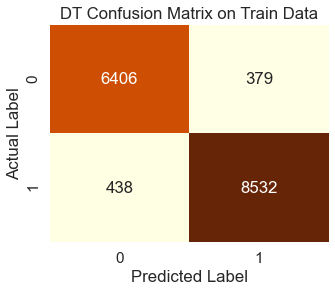

In [154]:
figure(figsize=(5, 4))
confusion_matrix(DT_y_train,dt_best.predict(DT_X_train))
sns.heatmap(confusion_matrix(DT_y_train,dt_best.predict(DT_X_train)),annot=True, fmt='d',cbar=False, cmap='YlOrBr')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('DT Confusion Matrix on Train Data')
plt.show()

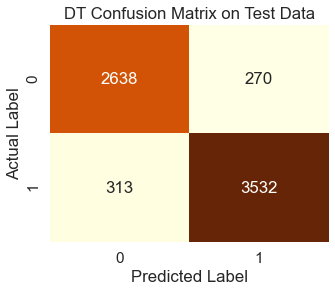

In [155]:
figure(figsize=(5, 4))
confusion_matrix(DT_y_test, dt_best.predict(DT_X_test))
sns.heatmap(confusion_matrix(DT_y_test,dt_best.predict(DT_X_test)),annot=True, fmt='d',cbar=False, cmap='YlOrBr')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('DT Confusion Matrix on Test Data')
plt.show()

AUC: 0.992


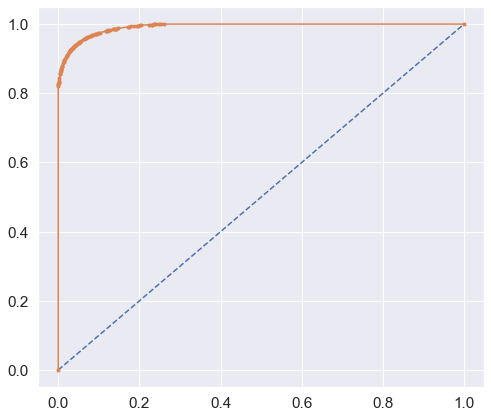

In [156]:
# predict probabilities
figure(figsize=(8, 7))
probs = dt_best.predict_proba(DT_X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(DT_y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(DT_y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.959


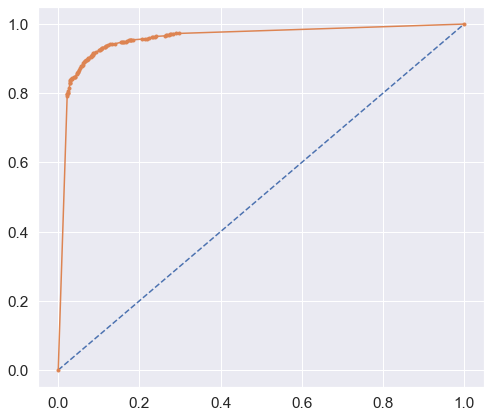

In [157]:
# predict probabilities
figure(figsize=(8, 7))
probs= dt_best.predict_proba(DT_X_test)
# keep probabilities for the positive outcome only
probs=probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(DT_y_test,probs)
print('AUC: %.3f'% auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr,tpr, thresholds=roc_curve(DT_y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr,tpr, marker='.')
# show the plot
plt.show()

In [158]:
results.loc['DT',:] = [accuracy_score(DT_y_train,dt_best.predict(DT_X_train)),
                          accuracy_score(DT_y_test,dt_best.predict(DT_X_test)),
                          roc_auc_score(DT_y_train,dt_best.predict_proba(DT_X_train)[:,1]),
                          roc_auc_score(DT_y_test,dt_best.predict_proba(DT_X_test)[:,1])]


In [159]:
results

,Train_Accuracy,Test_Accuracy,Train_ROC-AUC,Test_ROC-AUC
RF,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN
DT,0.948143,0.913668,0.992119,0.958776
Log_R,NaN,NaN,NaN,NaN
NN,NaN,NaN,NaN,NaN
NB,NaN,NaN,NaN,NaN


### Random Forest

In [160]:
random_state=[0,11,15,17,20,21,22,23,25,26,29,31,33,42]
for i in random_state:
    rf=RandomForestClassifier(random_state=i,oob_score=True)
    rf.fit(RF_X_train,RF_y_train)
    print(rf.oob_score_)

0.9211044112980006
0.9206601079022533
0.9227546810536338
0.9207870517296096
0.9203427483338623
0.9211678832116789
0.9205966359885751
0.9204062202475405
0.9209774674706442
0.922818152967312
0.921231355125357
0.9214217708663917
0.9225642653125992
0.9200253887654712


In [161]:
rfcl = RandomForestClassifier(n_estimators = 30,max_features=6,random_state=26)
rfcl = rfcl.fit(RF_X_train, RF_y_train)

In [162]:
rfcl

RandomForestClassifier(max_features=6, n_estimators=30, random_state=26)

In [163]:
ytrain_predict = rfcl.predict(RF_X_train)
ytest_predict = rfcl.predict(RF_X_test)

In [164]:
rfcl.score(RF_X_train,RF_y_train)

0.9965090447476992

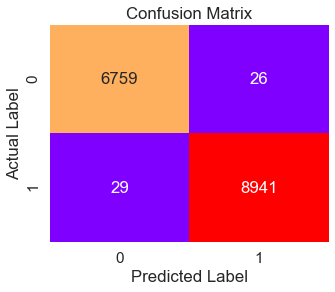

In [165]:
figure(figsize=(5, 4))
confusion_matrix(RF_y_train,ytrain_predict)
sns.heatmap(confusion_matrix(RF_y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [166]:
print(classification_report(RF_y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6785
         1.0       1.00      1.00      1.00      8970

    accuracy                           1.00     15755
   macro avg       1.00      1.00      1.00     15755
weighted avg       1.00      1.00      1.00     15755



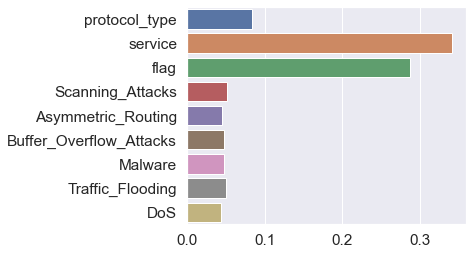

In [167]:
# Coefficient values- 
plt.figure(figsize=(5,4))
sns.barplot(x=[i for i in rf.feature_importances_],y=RF_X_train.columns)
plt.show()

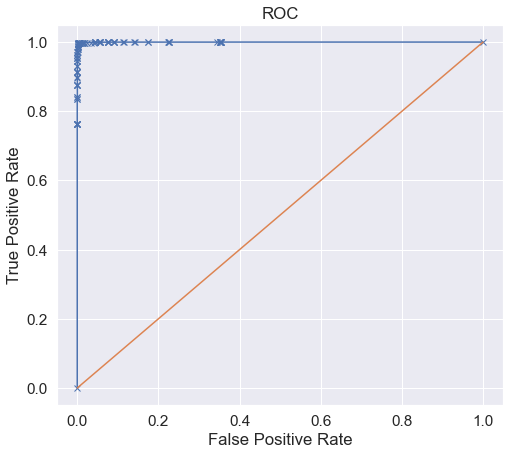

Area under Curve is 0.9998146774353881


In [168]:
rf_fpr, rf_tpr,_=roc_curve(RF_y_train,rfcl.predict_proba(RF_X_train)[:,1])
plt.figure(figsize=(8,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(RF_y_train,rfcl.predict_proba(RF_X_train)[:,1]))

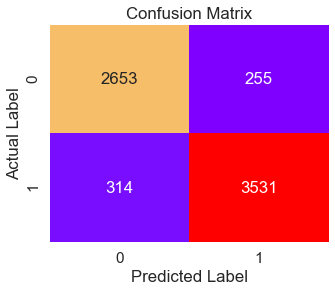

In [169]:
figure(figsize=(5, 4))
confusion_matrix(RF_y_test,ytest_predict)
sns.heatmap(confusion_matrix(RF_y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [170]:
print(classification_report(RF_y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      2908
         1.0       0.93      0.92      0.93      3845

    accuracy                           0.92      6753
   macro avg       0.91      0.92      0.91      6753
weighted avg       0.92      0.92      0.92      6753



In [171]:
rfcl.score(RF_X_test,RF_y_test)

0.9157411520805568

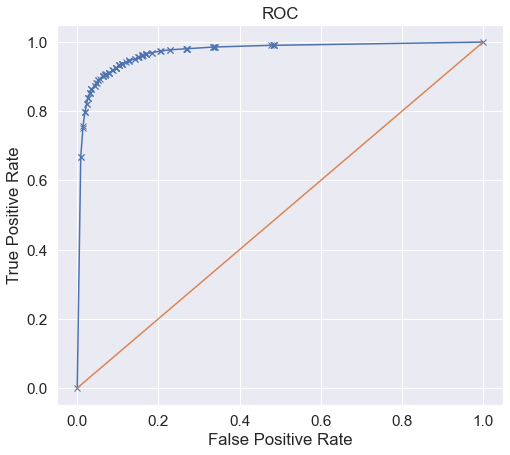

Area under Curve is 0.971236291795379


In [172]:
rf_fpr, rf_tpr,_=roc_curve(RF_y_test,rfcl.predict_proba(RF_X_test)[:,1])
plt.figure(figsize=(8,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(RF_y_test,rfcl.predict_proba(RF_X_test)[:,1]))

In [173]:
param_grid = {
    'max_depth': [130],
    'max_features': [6],
    'min_samples_leaf': [5],
    'min_samples_split': [5],
    'n_estimators': [110]
}

#param_grid = {
#    'max_depth': [130,140,145,150,155,160],
#    'max_features': [6,10,12,18,24,36],
#    'min_samples_leaf': [5,10, 20,40,60,80],
#    'min_samples_split': [5,10,20,30,40,50],
#    'n_estimators': [15,25,30,70,90,100,110,150]
#}
rfcl = RandomForestClassifier(random_state=26)

RF_grid_search = GridSearchCV(estimator = rfcl,n_jobs=-1, verbose=1, param_grid = param_grid, cv = 5,scoring="accuracy")

{'max_depth': 130,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 110}

In [174]:
%%time
RF_grid_search.fit(RF_X_train, RF_y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Wall time: 9.59 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=26), n_jobs=-1,
             param_grid={'max_depth': [130], 'max_features': [6],
                         'min_samples_leaf': [5], 'min_samples_split': [5],
                         'n_estimators': [110]},
             scoring='accuracy', verbose=1)

In [175]:
RF_grid_search.best_params_

{'max_depth': 130,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 110}

In [176]:
RF_best_grid = RF_grid_search.best_estimator_

In [177]:
ytrain_predict = RF_best_grid.predict(RF_X_train)
ytest_predict = RF_best_grid.predict(RF_X_test)

In [178]:
confusion_matrix(RF_y_train,ytrain_predict)

array([[6515,  270],
       [ 299, 8671]], dtype=int64)

In [179]:
print(classification_report(RF_y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      6785
         1.0       0.97      0.97      0.97      8970

    accuracy                           0.96     15755
   macro avg       0.96      0.96      0.96     15755
weighted avg       0.96      0.96      0.96     15755



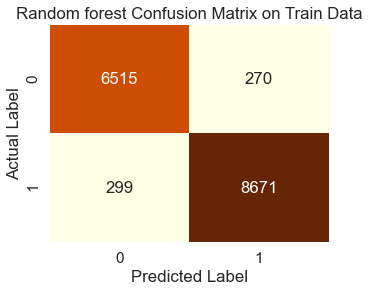

In [180]:
figure(figsize=(5, 4))
confusion_matrix(RF_y_train,RF_best_grid.predict(RF_X_train))
sns.heatmap(confusion_matrix(RF_y_train,RF_best_grid.predict(RF_X_train)),annot=True, fmt='d',cbar=False, cmap='YlOrBr')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random forest Confusion Matrix on Train Data')
plt.show()

<Figure size 576x504 with 0 Axes>

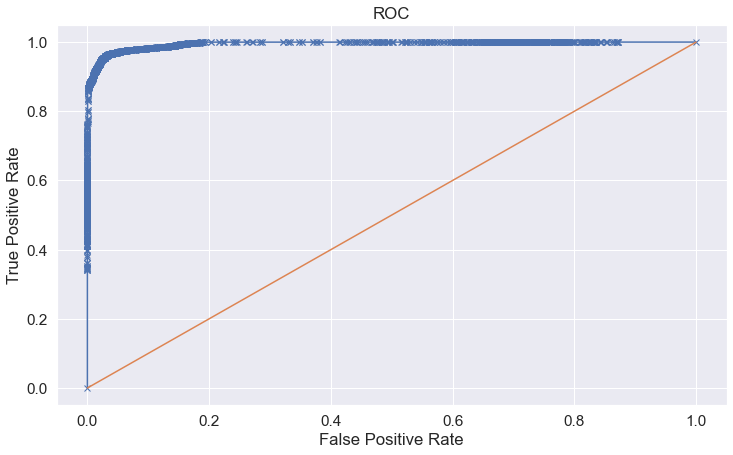

Area under Curve is 0.9948585681083839


In [181]:
figure(figsize=(8, 7))
rf_fpr, rf_tpr,_=roc_curve(RF_y_train,RF_best_grid.predict_proba(RF_X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(RF_y_train,RF_best_grid.predict_proba(RF_X_train)[:,1]))

In [182]:
confusion_matrix(RF_y_test,ytest_predict)

array([[2667,  241],
       [ 297, 3548]], dtype=int64)

In [183]:
print(classification_report(RF_y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      2908
         1.0       0.94      0.92      0.93      3845

    accuracy                           0.92      6753
   macro avg       0.92      0.92      0.92      6753
weighted avg       0.92      0.92      0.92      6753



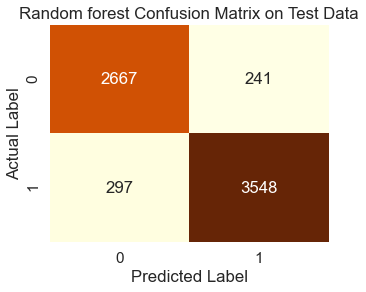

In [184]:
figure(figsize=(5, 4))
confusion_matrix(RF_y_test,RF_best_grid.predict(RF_X_test))
sns.heatmap(confusion_matrix(RF_y_test,RF_best_grid.predict(RF_X_test)),annot=True, fmt='d',cbar=False, cmap='YlOrBr')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random forest Confusion Matrix on Test Data')
plt.show()

<Figure size 576x504 with 0 Axes>

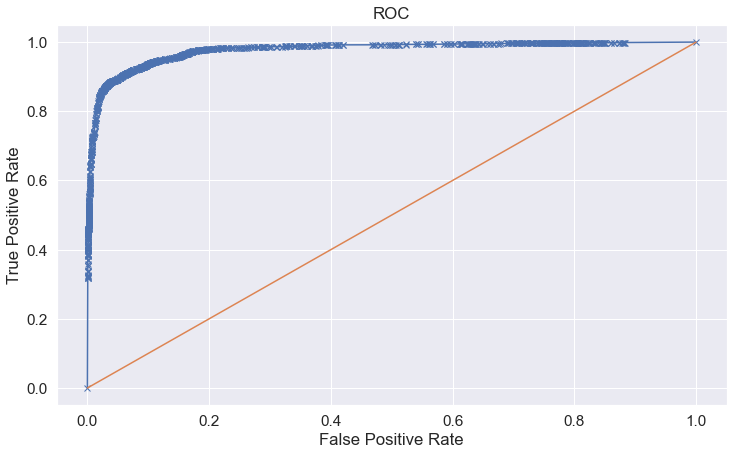

Area under Curve is 0.9766009376403018


In [185]:
figure(figsize=(8, 7))
rf_fpr, rf_tpr,_=roc_curve(RF_y_test,RF_best_grid.predict_proba(RF_X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(RF_y_test,RF_best_grid.predict_proba(RF_X_test)[:,1]))

In [186]:
results.loc['RF',:] = [accuracy_score(RF_y_train,RF_best_grid.predict(RF_X_train)),
                          accuracy_score(RF_y_test,RF_best_grid.predict(RF_X_test)),
                          roc_auc_score(RF_y_train,RF_best_grid.predict_proba(RF_X_train)[:,1]),
                          roc_auc_score(RF_y_test,RF_best_grid.predict_proba(RF_X_test)[:,1])]

In [187]:
results

,Train_Accuracy,Test_Accuracy,Train_ROC-AUC,Test_ROC-AUC
RF,0.963884,0.920332,0.994859,0.976601
KNN,NaN,NaN,NaN,NaN
DT,0.948143,0.913668,0.992119,0.958776
Log_R,NaN,NaN,NaN,NaN
NN,NaN,NaN,NaN,NaN
NB,NaN,NaN,NaN,NaN


### Logistic Regression

In [188]:
LogReg = LogisticRegression()
LogReg.fit(LR_X_train, LR_y_train)

LogisticRegression()

In [189]:
ytrain_predict = LogReg.predict(LR_X_train)
ytest_predict = LogReg.predict(LR_X_test)

In [190]:
ytest_predict_prob=LogReg.predict_proba(LR_X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.015922,0.984078
1,0.816971,0.183029
2,0.657165,0.342835
3,0.047021,0.952979
4,0.707328,0.292672


In [191]:
LogReg.score(LR_X_train, LR_y_train)

0.8568708346556648

In [192]:
LogReg.score(LR_X_test, LR_y_test)

0.8416999851917666

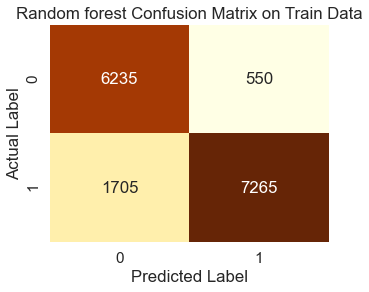

In [193]:
figure(figsize=(5, 4))
confusion_matrix(LR_y_train,LogReg.predict(LR_X_train))
sns.heatmap(confusion_matrix(LR_y_train,LogReg.predict(LR_X_train)),annot=True, fmt='d',cbar=False, cmap='YlOrBr')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random forest Confusion Matrix on Train Data')
plt.show()

In [194]:
print(classification_report(LR_y_train,LogReg.predict(LR_X_train)))

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85      6785
         1.0       0.93      0.81      0.87      8970

    accuracy                           0.86     15755
   macro avg       0.86      0.86      0.86     15755
weighted avg       0.87      0.86      0.86     15755



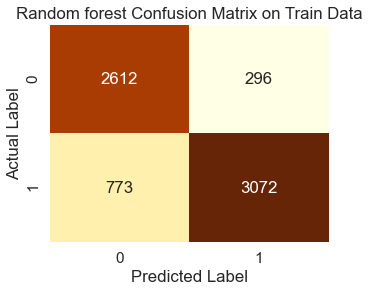

In [195]:
figure(figsize=(5, 4))
confusion_matrix(LR_y_test,LogReg.predict(LR_X_test))
sns.heatmap(confusion_matrix(LR_y_test,LogReg.predict(LR_X_test)),annot=True, fmt='d',cbar=False, cmap='YlOrBr')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random forest Confusion Matrix on Train Data')
plt.show()

In [196]:
print(classification_report(LR_y_test,LogReg.predict(LR_X_test)))

              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83      2908
         1.0       0.91      0.80      0.85      3845

    accuracy                           0.84      6753
   macro avg       0.84      0.85      0.84      6753
weighted avg       0.85      0.84      0.84      6753



AUC: 0.898


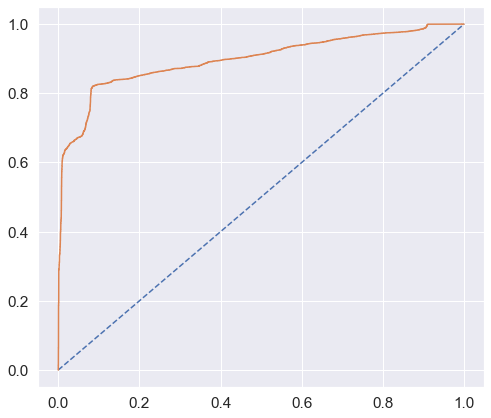

In [197]:
figure(figsize=(8, 7))
# predict probabilities
probs = LogReg.predict_proba(LR_X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(LR_y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(LR_y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.890


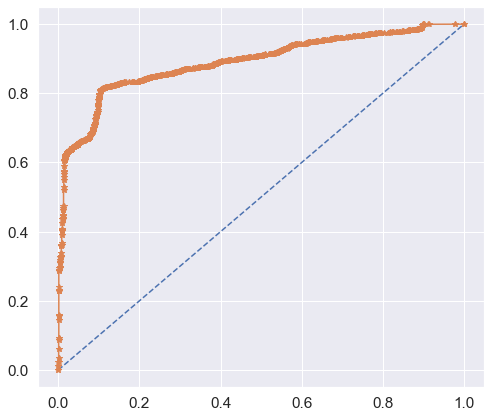

In [198]:
figure(figsize=(8, 7))
# predict probabilities
probs = LogReg.predict_proba(LR_X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(LR_y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
LogR_fpr, LogR_tpr, test_thresholds = roc_curve(LR_y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LogR_fpr, LogR_tpr, marker='*', label='Logistic Regression')

In [199]:
results.loc['Log_R',:] = [accuracy_score(LR_y_train,LogReg.predict(LR_X_train)),
                          accuracy_score(LR_y_test,LogReg.predict(LR_X_test)),
                          roc_auc_score(LR_y_train,LogReg.predict_proba(LR_X_train)[:,1]),
                          roc_auc_score(LR_y_test,LogReg.predict_proba(LR_X_test)[:,1])]

In [200]:
results

,Train_Accuracy,Test_Accuracy,Train_ROC-AUC,Test_ROC-AUC
RF,0.963884,0.920332,0.994859,0.976601
KNN,NaN,NaN,NaN,NaN
DT,0.948143,0.913668,0.992119,0.958776
Log_R,0.856871,0.841700,0.898015,0.889709
NN,NaN,NaN,NaN,NaN
NB,NaN,NaN,NaN,NaN


In [201]:
naiv_b=GaussianNB()
naiv_b.fit(NB_X_train,NB_y_train)

GaussianNB()

In [202]:
print(classification_report(NB_y_train,naiv_b.predict(NB_X_train)))

              precision    recall  f1-score   support

         0.0       0.70      0.95      0.80      6785
         1.0       0.95      0.69      0.80      8970

    accuracy                           0.80     15755
   macro avg       0.82      0.82      0.80     15755
weighted avg       0.84      0.80      0.80     15755



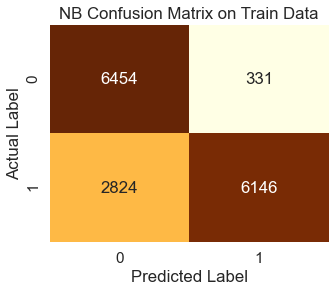

In [203]:
figure(figsize=(5, 4))
confusion_matrix(NB_y_train,naiv_b.predict(NB_X_train))
sns.heatmap(confusion_matrix(NB_y_train,naiv_b.predict(NB_X_train)),annot=True, fmt='d',cbar=False, cmap='YlOrBr')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('NB Confusion Matrix on Train Data')
plt.show()

In [204]:
print(classification_report(NB_y_test,naiv_b.predict(NB_X_test)))

              precision    recall  f1-score   support

         0.0       0.69      0.94      0.79      2908
         1.0       0.93      0.67      0.78      3845

    accuracy                           0.79      6753
   macro avg       0.81      0.81      0.79      6753
weighted avg       0.83      0.79      0.79      6753



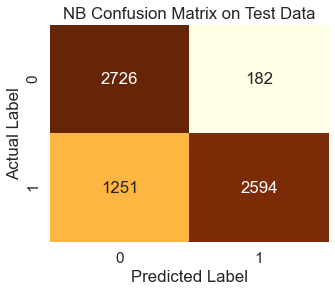

In [205]:
figure(figsize=(5, 4))
confusion_matrix(NB_y_test,naiv_b.predict(NB_X_test))
sns.heatmap(confusion_matrix(NB_y_test,naiv_b.predict(NB_X_test)),annot=True, fmt='d',cbar=False, cmap='YlOrBr')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('NB Confusion Matrix on Test Data')
plt.show()

Naive Bayes on Train: ROC AUC=0.897


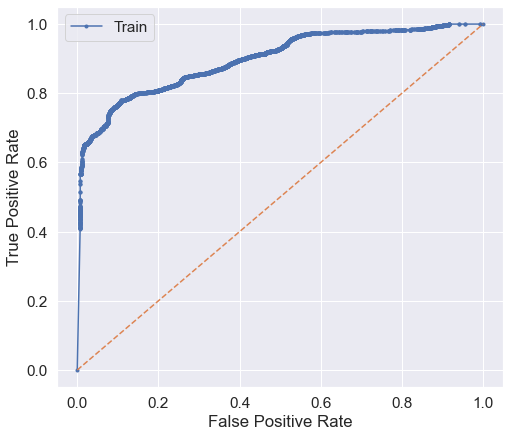

In [206]:
figure(figsize=(8, 7))
lr_probs_NB = naiv_b.predict_proba(NB_X_train)
# keep probabilities for the positive outcome only
lr_probs_NB = lr_probs_NB[:, 1]
# calculate scores
lr_auc = roc_auc_score(NB_y_train, lr_probs_NB)
# summarize scores
print('Naive Bayes on Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(NB_y_train, lr_probs_NB)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')
plt.plot([0, 1], [0, 1], linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Naive Bayes: ROC AUC=0.888


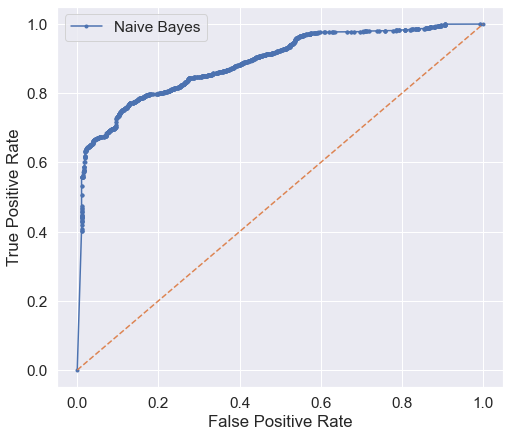

In [207]:
figure(figsize=(8, 7))
lr_probs_NB = naiv_b.predict_proba(NB_X_test)
# keep probabilities for the positive outcome only
lr_probs_NB = lr_probs_NB[:, 1]
# calculate scores
lr_auc = roc_auc_score(NB_y_test, lr_probs_NB)
# summarize scores
print('Naive Bayes: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
NB_lr_fpr, NB_lr_tpr, _ = roc_curve(NB_y_test, lr_probs_NB)
# plot the roc curve for the model
plt.plot(NB_lr_fpr, NB_lr_tpr, marker='.', label='Naive Bayes')
plt.plot([0, 1], [0, 1], linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [208]:
results.loc['NB',:] = [accuracy_score(NB_y_train,naiv_b.predict(NB_X_train)),
                          accuracy_score(NB_y_test,naiv_b.predict(NB_X_test)),
                          roc_auc_score(NB_y_train,naiv_b.predict_proba(NB_X_train)[:,1]),
                          roc_auc_score(NB_y_test,naiv_b.predict_proba(NB_X_test)[:,1])]

In [209]:
results

,Train_Accuracy,Test_Accuracy,Train_ROC-AUC,Test_ROC-AUC
RF,0.963884,0.920332,0.994859,0.976601
KNN,NaN,NaN,NaN,NaN
DT,0.948143,0.913668,0.992119,0.958776
Log_R,0.856871,0.841700,0.898015,0.889709
NN,NaN,NaN,NaN,NaN
NB,0.799746,0.787798,0.897412,0.888483


In [210]:
### KNN Classifier

In [211]:
knn=KNeighborsClassifier()
knn.fit(KNN_X_train,KNN_y_train)

KNeighborsClassifier()

In [212]:
print(classification_report(KNN_y_train,knn.predict(KNN_X_train)))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      6785
         1.0       0.95      0.95      0.95      8970

    accuracy                           0.94     15755
   macro avg       0.94      0.94      0.94     15755
weighted avg       0.94      0.94      0.94     15755



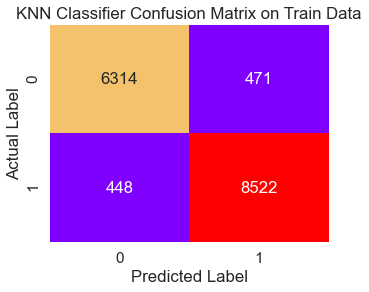

In [213]:
figure(figsize=(5, 4))
confusion_matrix(KNN_y_train,knn.predict(KNN_X_train))
sns.heatmap(confusion_matrix(KNN_y_train,knn.predict(KNN_X_train)),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN Classifier Confusion Matrix on Train Data')
plt.show()

In [214]:
print(classification_report(KNN_y_test,knn.predict(KNN_X_test)))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      2908
         1.0       0.92      0.92      0.92      3845

    accuracy                           0.91      6753
   macro avg       0.91      0.91      0.91      6753
weighted avg       0.91      0.91      0.91      6753



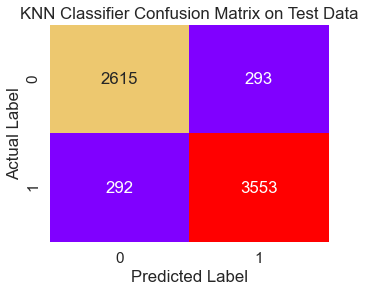

In [215]:
figure(figsize=(5, 4))
confusion_matrix(KNN_y_test,knn.predict(KNN_X_test))
sns.heatmap(confusion_matrix(KNN_y_test,knn.predict(KNN_X_test)),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN Classifier Confusion Matrix on Test Data')
plt.show()

KNN Classifier Train: ROC AUC=0.989


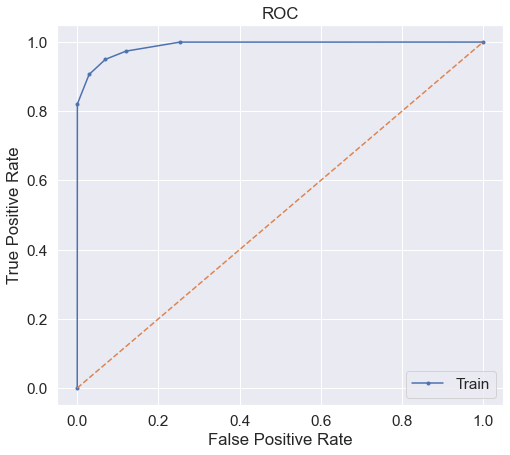

In [216]:
figure(figsize=(8, 7))
lr_probs_KNN = knn.predict_proba(KNN_X_train)
# keep probabilities for the positive outcome only
lr_probs_KNN = lr_probs_KNN[:, 1]
# calculate scores
lr_auc_KNN = roc_auc_score(KNN_y_train, lr_probs_KNN)
# summarize scores
print('KNN Classifier Train: ROC AUC=%.3f' % (lr_auc_KNN))

# calculate roc curves
lr_fpr_KNN, lr_tpr_KNN, _ = roc_curve(KNN_y_train, lr_probs_KNN)
# plot the roc curve for the model
plt.plot(lr_fpr_KNN, lr_tpr_KNN, marker='.', label='Train')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

KNN Classifier Train: ROC AUC=0.961


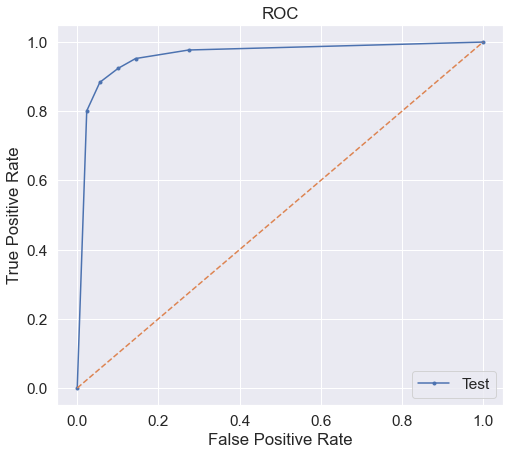

In [217]:
figure(figsize=(8, 7))
lr_probs_KNN_test = knn.predict_proba(KNN_X_test)
# keep probabilities for the positive outcome only
lr_probs_KNN_test = lr_probs_KNN_test[:, 1]
# calculate scores
lr_auc_KNN_test = roc_auc_score(KNN_y_test, lr_probs_KNN_test)
# summarize scores
print('KNN Classifier Train: ROC AUC=%.3f' % (lr_auc_KNN_test))

# calculate roc curves
lr_fpr_KNN_test, lr_tpr_KNN_test, _ = roc_curve(KNN_y_test, lr_probs_KNN_test)
# plot the roc curve for the model
plt.plot(lr_fpr_KNN_test, lr_tpr_KNN_test, marker='.', label='Test')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [218]:
params = {'n_neighbors':[10],
         'weights':['distance'],'p':[3]}
#params = {'n_neighbors':[5,10,15,25,30,35],
 #        'weights':['uniform', 'distance'],'p':[3,5,8,11]}

In [219]:
%%time
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=params,refit=True,verbose=1)
grid_knn.fit(KNN_X_train,KNN_y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Wall time: 2.62 s


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10], 'p': [3],
                         'weights': ['distance']},
             verbose=1)

In [220]:
grid_knn.best_params_

{'n_neighbors': 10, 'p': 3, 'weights': 'distance'}

In [221]:
print(classification_report(KNN_y_train,grid_knn.predict(KNN_X_train)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6785
         1.0       1.00      1.00      1.00      8970

    accuracy                           1.00     15755
   macro avg       1.00      1.00      1.00     15755
weighted avg       1.00      1.00      1.00     15755



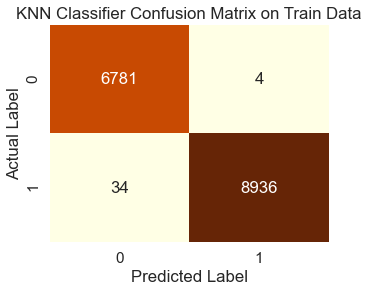

In [222]:
figure(figsize=(5, 4))
confusion_matrix(KNN_y_train,grid_knn.predict(KNN_X_train))
sns.heatmap(confusion_matrix(KNN_y_train,grid_knn.predict(KNN_X_train)),annot=True, fmt='d',cbar=False, cmap='YlOrBr')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN Classifier Confusion Matrix on Train Data')
plt.show()

In [223]:
print(classification_report(KNN_y_test,grid_knn.predict(KNN_X_test)))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      2908
         1.0       0.93      0.93      0.93      3845

    accuracy                           0.92      6753
   macro avg       0.91      0.91      0.91      6753
weighted avg       0.92      0.92      0.92      6753



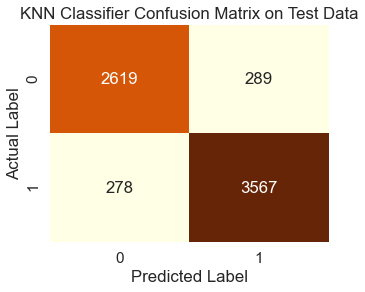

In [224]:
figure(figsize=(5, 4))
confusion_matrix(KNN_y_test,grid_knn.predict(KNN_X_test))
sns.heatmap(confusion_matrix(KNN_y_test,grid_knn.predict(KNN_X_test)),annot=True, fmt='d',cbar=False, cmap='YlOrBr')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN Classifier Confusion Matrix on Test Data')
plt.show()

KNN Classifier Train: ROC AUC=1.000


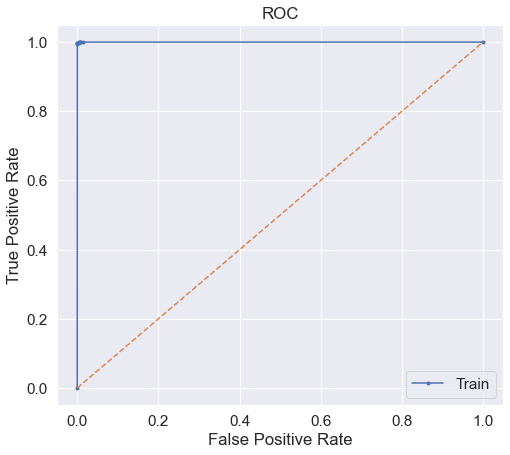

In [225]:
figure(figsize=(8, 7))
lr_probs_KNN = grid_knn.predict_proba(KNN_X_train)
# keep probabilities for the positive outcome only
lr_probs_KNN = lr_probs_KNN[:, 1]
# calculate scores
lr_auc_KNN = roc_auc_score(KNN_y_train, lr_probs_KNN)
# summarize scores
print('KNN Classifier Train: ROC AUC=%.3f' % (lr_auc_KNN))

# calculate roc curves
lr_fpr_KNN, lr_tpr_KNN, _ = roc_curve(KNN_y_train, lr_probs_KNN)
# plot the roc curve for the model
plt.plot(lr_fpr_KNN, lr_tpr_KNN, marker='.', label='Train')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

KNN Classifier Train: ROC AUC=0.968


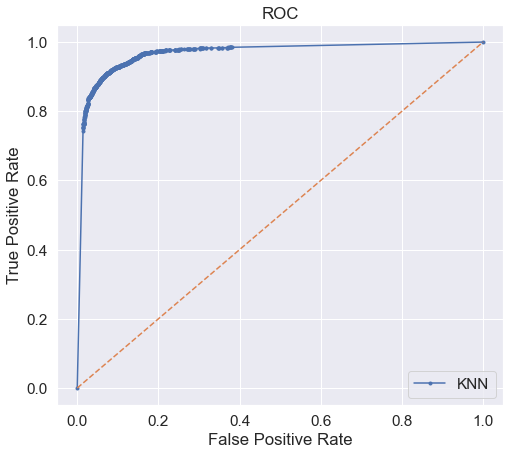

In [226]:
figure(figsize=(8, 7))
lr_probs_KNN_test = grid_knn.predict_proba(KNN_X_test)
# keep probabilities for the positive outcome only
lr_probs_KNN_test = lr_probs_KNN_test[:, 1]
# calculate scores
lr_auc_KNN_test = roc_auc_score(KNN_y_test, lr_probs_KNN_test)
# summarize scores
print('KNN Classifier Train: ROC AUC=%.3f' % (lr_auc_KNN_test))

# calculate roc curves
lr_fpr_KNN_test, lr_tpr_KNN_test, _ = roc_curve(KNN_y_test, lr_probs_KNN_test)
# plot the roc curve for the model
plt.plot(lr_fpr_KNN_test, lr_tpr_KNN_test, marker='.', label='KNN')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [227]:
results.loc['KNN',:] = [accuracy_score(KNN_y_train,knn.predict(KNN_X_train)),
                          accuracy_score(KNN_y_test,knn.predict(KNN_X_test)),
                          roc_auc_score(KNN_y_train,knn.predict_proba(KNN_X_train)[:,1]),
                          roc_auc_score(KNN_y_test,knn.predict_proba(KNN_X_test)[:,1])]

In [228]:
results

,Train_Accuracy,Test_Accuracy,Train_ROC-AUC,Test_ROC-AUC
RF,0.963884,0.920332,0.994859,0.976601
KNN,0.941669,0.913372,0.989282,0.960987
DT,0.948143,0.913668,0.992119,0.958776
Log_R,0.856871,0.841700,0.898015,0.889709
NN,NaN,NaN,NaN,NaN
NB,0.799746,0.787798,0.897412,0.888483


In [229]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [230]:
# Fit the model on the training data
clf.fit(NN_X_train, NN_y_train)

Iteration 1, loss = 0.46674895
Iteration 2, loss = 0.43617828
Iteration 3, loss = 0.42550028
Iteration 4, loss = 0.41609744
Iteration 5, loss = 0.40990555
Iteration 6, loss = 0.40373581
Iteration 7, loss = 0.39833461
Iteration 8, loss = 0.39421386
Iteration 9, loss = 0.38995783
Iteration 10, loss = 0.38638847
Iteration 11, loss = 0.38212129
Iteration 12, loss = 0.37889168
Iteration 13, loss = 0.37640718
Iteration 14, loss = 0.37411122
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

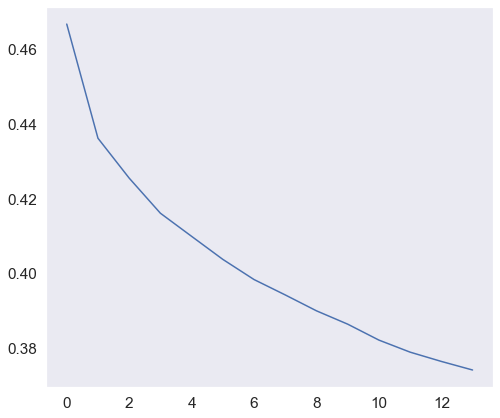

In [231]:
figure(figsize=(8, 7))
plt.plot(clf.loss_curve_)
plt.grid();

In [232]:
# use the model to predict the training data
y_pred = clf.predict(NN_X_train)

In [233]:
confusion_matrix(NN_y_train,y_pred)

array([[5606, 1179],
       [1202, 7768]], dtype=int64)

In [234]:
clf.score(NN_X_train,NN_y_train)

0.848873373532212

<AxesSubplot:>

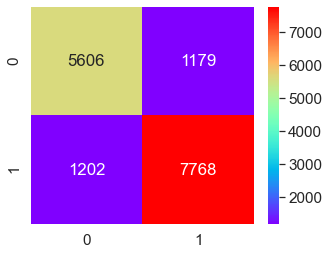

In [235]:
figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(NN_y_train,y_pred),annot=True, fmt='.5g',cmap='rainbow')

In [236]:
print(classification_report(NN_y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82      6785
         1.0       0.87      0.87      0.87      8970

    accuracy                           0.85     15755
   macro avg       0.85      0.85      0.85     15755
weighted avg       0.85      0.85      0.85     15755



AUC: 0.917


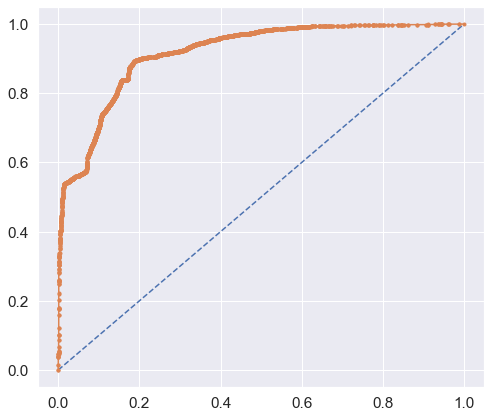

In [237]:
# AUC and ROC for the training data
figure(figsize=(8, 7))
# predict probabilities
probs = clf.predict_proba(NN_X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(NN_y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(NN_y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [238]:
y_pred = clf.predict(NN_X_test)

In [239]:
confusion_matrix(NN_y_test, y_pred)

array([[2372,  536],
       [ 533, 3312]], dtype=int64)

<AxesSubplot:>

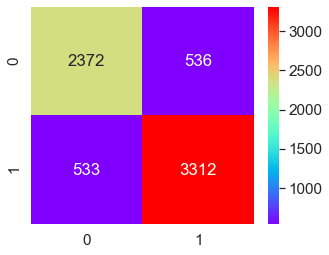

In [240]:
figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(NN_y_test,y_pred),annot=True, fmt='.5g',cmap='rainbow')

In [241]:
clf.score(NN_X_test,NN_y_test)

0.8416999851917666

AUC: 0.908


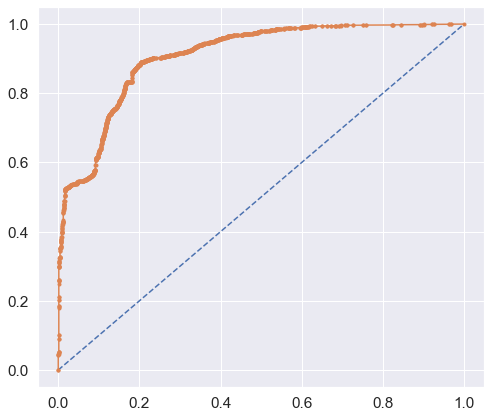

In [242]:
# AUC and ROC for the test data
figure(figsize=(8, 7))
# predict probabilities
probs = clf.predict_proba(NN_X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(NN_y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(NN_y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [243]:
param_grid = {
    'hidden_layer_sizes': [750],
    'max_iter': [5000],
    'solver': ['adam'],
    'tol': [0.01],
}

#param_grid = {
 #   'hidden_layer_sizes': [100,250,500,750],
  #  'max_iter': [5000,2500,7000,6000],
   # 'solver': ['sgd','adam'],
    #'tol': [0.01],
#}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl,n_jobs=-1, param_grid = param_grid, cv = 10)

In [244]:
%%time
grid_search.fit(NN_X_train, NN_y_train)

Wall time: 20.9 s


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [750], 'max_iter': [5000],
                         'solver': ['adam'], 'tol': [0.01]})

In [245]:
grid_search.best_params_

{'hidden_layer_sizes': 750, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}

In [246]:
best_grid = grid_search.best_estimator_

In [247]:
ytrain_predict = best_grid.predict(NN_X_train)
ytest_predict = best_grid.predict(NN_X_test)

In [248]:
confusion_matrix(NN_y_train,ytrain_predict)

array([[6011,  774],
       [ 845, 8125]], dtype=int64)

In [249]:
clf.score(NN_X_train,NN_y_train)

0.848873373532212

In [250]:
print(classification_report(NN_y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      6785
         1.0       0.91      0.91      0.91      8970

    accuracy                           0.90     15755
   macro avg       0.89      0.90      0.90     15755
weighted avg       0.90      0.90      0.90     15755



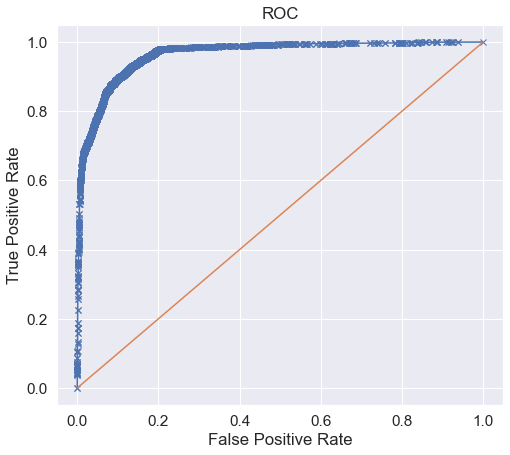

Area under Curve is 0.9643997308641185


In [251]:
figure(figsize=(8, 7))
rf_fpr, rf_tpr,_=roc_curve(NN_y_train,best_grid.predict_proba(NN_X_train)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(NN_y_train,best_grid.predict_proba(NN_X_train)[:,1]))

In [252]:
confusion_matrix(NN_y_test,ytest_predict)

array([[2536,  372],
       [ 384, 3461]], dtype=int64)

In [253]:
clf.score(NN_X_test,NN_y_test)

0.8416999851917666

In [254]:
print(classification_report(NN_y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      2908
         1.0       0.90      0.90      0.90      3845

    accuracy                           0.89      6753
   macro avg       0.89      0.89      0.89      6753
weighted avg       0.89      0.89      0.89      6753



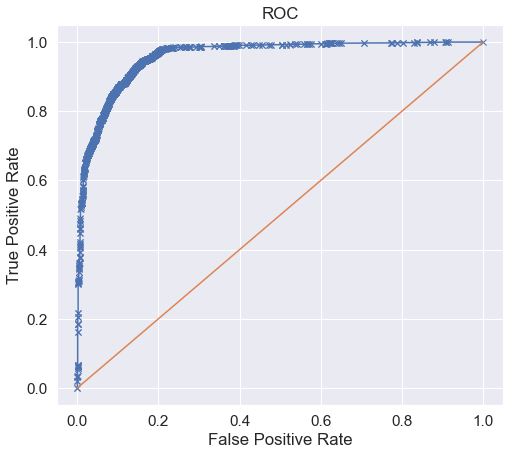

Area under Curve is 0.9584325469580353


In [255]:
figure(figsize=(8, 7))
nn_rf_fpr, nn_rf_tpr,_=roc_curve(NN_y_test,best_grid.predict_proba(NN_X_test)[:,1])
plt.plot(nn_rf_fpr,nn_rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(NN_y_test,best_grid.predict_proba(NN_X_test)[:,1]))

In [256]:
results.loc['NN',:] = [accuracy_score(NN_y_train,naiv_b.predict(NN_X_train)),
                          accuracy_score(NN_y_test,naiv_b.predict(NN_X_test)),
                          roc_auc_score(NN_y_train,naiv_b.predict_proba(NN_X_train)[:,1]),
                          roc_auc_score(NN_y_test,naiv_b.predict_proba(NN_X_test)[:,1])]

In [257]:
results

,Train_Accuracy,Test_Accuracy,Train_ROC-AUC,Test_ROC-AUC
RF,0.963884,0.920332,0.994859,0.976601
KNN,0.941669,0.913372,0.989282,0.960987
DT,0.948143,0.913668,0.992119,0.958776
Log_R,0.856871,0.841700,0.898015,0.889709
NN,0.799746,0.787798,0.897412,0.888483
NB,0.799746,0.787798,0.897412,0.888483


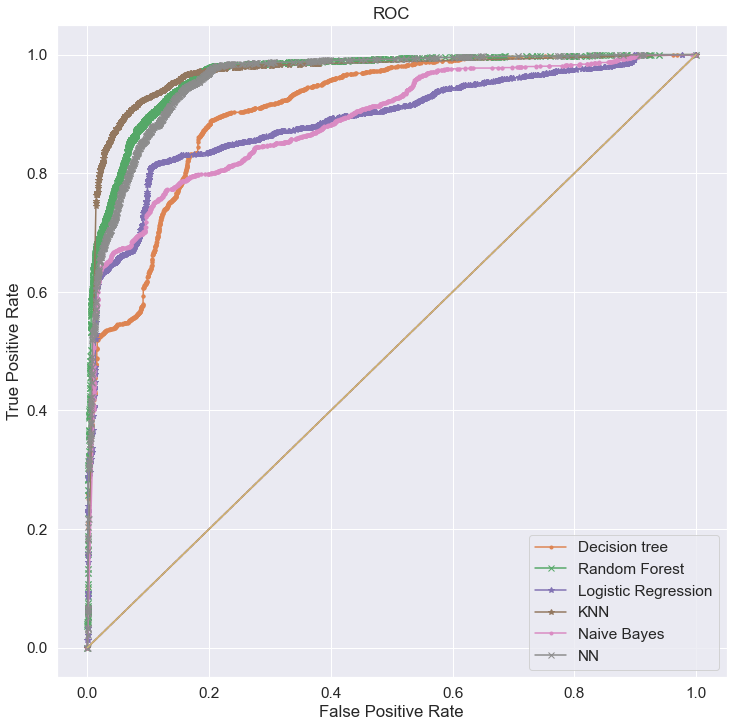

In [258]:
plt.figure(figsize=(12,12))
fpr,tpr, thresholds=roc_curve(DT_y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr,tpr, marker='.',label='Decision tree')
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
# show the plot
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.plot(LogR_fpr, LogR_tpr, marker='*', label='Logistic Regression')
plt.plot(lr_fpr_KNN_test, lr_tpr_KNN_test, marker='*', label='KNN')
plt.plot(NB_lr_fpr, NB_lr_tpr, marker='.', label='Naive Bayes')
plt.plot(nn_rf_fpr,nn_rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC')
plt.legend()
plt.show()

Text(0.5, 1.0, 'KNN Classifier Confusion Matrix on Test Data')

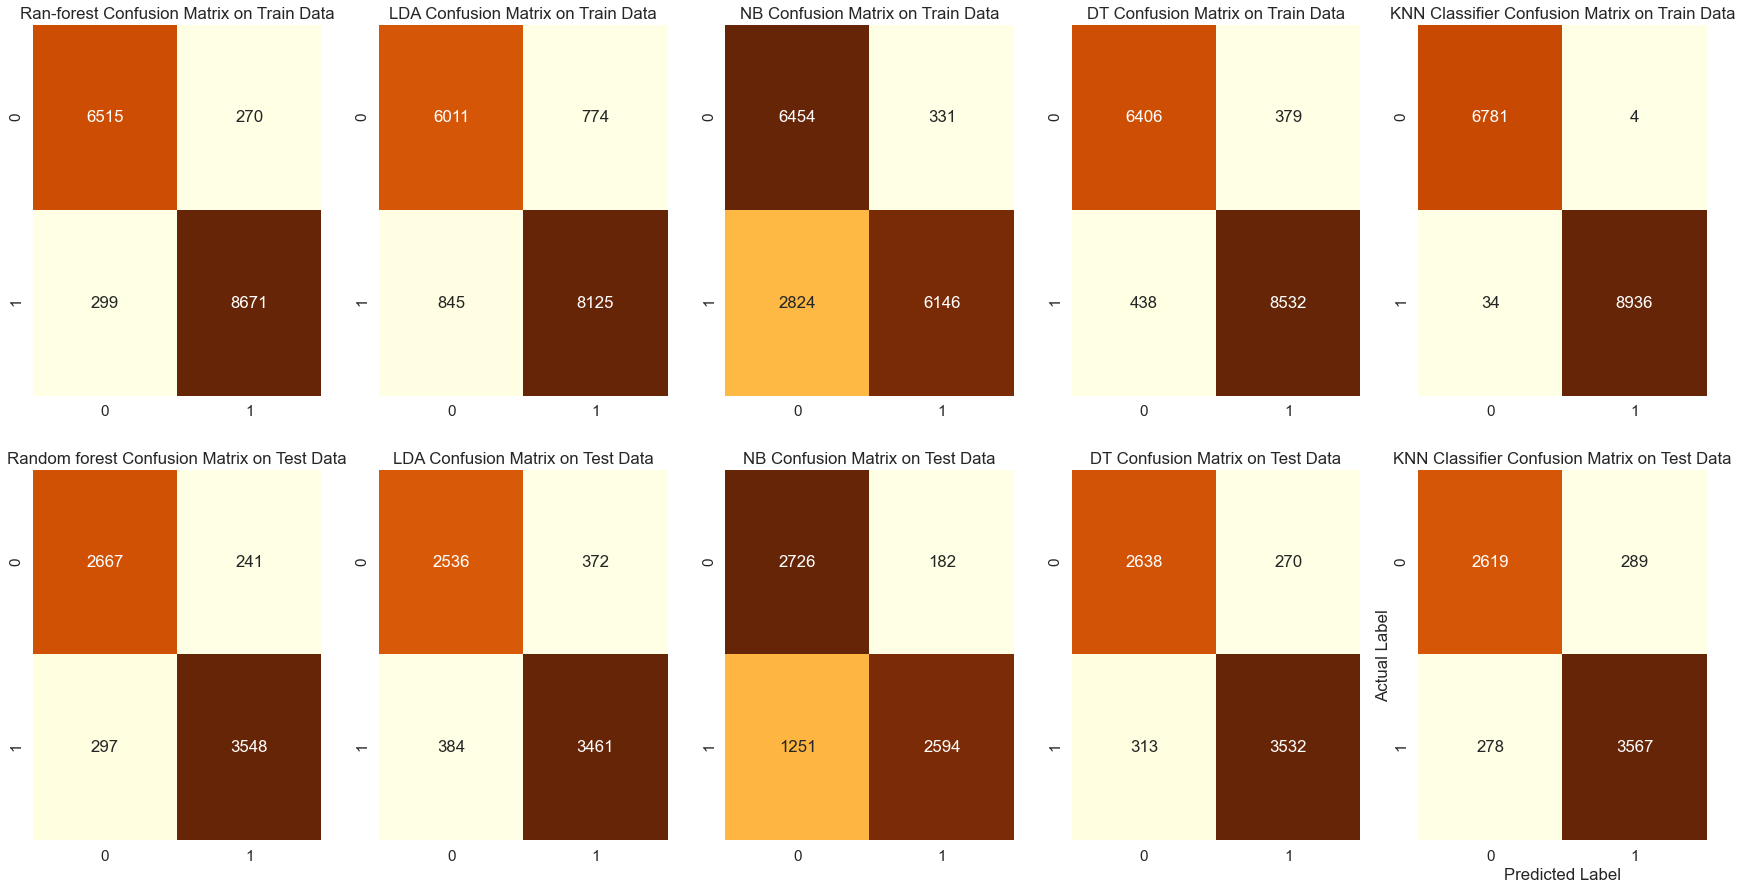

In [259]:
fig, axes = plt.subplots(nrows=2,ncols=5)
fig.set_size_inches(30, 15)

sns.heatmap(confusion_matrix(RF_y_train,RF_best_grid.predict(RF_X_train)),annot=True, fmt='d',cbar=False, cmap='YlOrBr',ax=axes[0][0])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
axes[0, 0].set_title("Ran-forest Confusion Matrix on Train Data")
#plt.title('Random forest Confusion Matrix on Train Data')

sns.heatmap(confusion_matrix(LR_y_train, best_grid.predict(LR_X_train)),annot=True, fmt='d',cbar=False, cmap='YlOrBr',ax=axes[0][1])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
axes[0,1].set_title("LDA Confusion Matrix on Train Data")
#plt.title('LDA Confusion Matrix on Train Data')

sns.heatmap(confusion_matrix(NB_y_train,naiv_b.predict(NB_X_train)),annot=True, fmt='d',cbar=False, cmap='YlOrBr',ax=axes[0][2])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
axes[0,2].set_title("NB Confusion Matrix on Train Data")
#plt.title('NB Confusion Matrix on Train Data')

sns.heatmap(confusion_matrix(DT_y_train,dt_best.predict(DT_X_train)),annot=True, fmt='d',cbar=False, cmap='YlOrBr',ax=axes[0][3])
plt.title('DT Confusion Matrix on Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
axes[0,3].set_title("DT Confusion Matrix on Train Data")

confusion_matrix(KNN_y_train,grid_knn.predict(KNN_X_train))
sns.heatmap(confusion_matrix(KNN_y_train,grid_knn.predict(KNN_X_train)),annot=True, fmt='d',cbar=False, cmap='YlOrBr', ax=axes[0][4])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
axes[0,4].set_title("KNN Classifier Confusion Matrix on Train Data")
#plt.title('KNN Classifier Confusion Matrix on Train Data')

sns.heatmap(confusion_matrix(RF_y_test,RF_best_grid.predict(RF_X_test)),annot=True, fmt='d',cbar=False, cmap='YlOrBr',ax=axes[1][0])
#plt.title('Random forest Confusion Matrix on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
axes[1,0].set_title('Random forest Confusion Matrix on Test Data')

sns.heatmap(confusion_matrix(LR_y_test,best_grid.predict(LR_X_test)),annot=True, fmt='d',cbar=False, cmap='YlOrBr',ax=axes[1][1])
#plt.title('LDA Confusion Matrix on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
axes[1,1].set_title('LDA Confusion Matrix on Test Data')

sns.heatmap(confusion_matrix(NB_y_test,naiv_b.predict(NB_X_test)),annot=True, fmt='d',cbar=False, cmap='YlOrBr',ax=axes[1][2])
#plt.title('NB Confusion Matrix on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
axes[1,2].set_title('NB Confusion Matrix on Test Data')

sns.heatmap(confusion_matrix(DT_y_test,dt_best.predict(DT_X_test)),annot=True, fmt='d',cbar=False, cmap='YlOrBr',ax=axes[1][3])
plt.title('DT Confusion Matrix on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
axes[1,3].set_title('DT Confusion Matrix on Test Data')

sns.heatmap(confusion_matrix(KNN_y_test,grid_knn.predict(KNN_X_test)),annot=True, fmt='d',cbar=False, cmap='YlOrBr',ax=axes[1][4])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
axes[1,4].set_title('KNN Classifier Confusion Matrix on Test Data')
#plt.tight_layout()'''
